# EDA on Diabetes Patient

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

## Reading CSV

In [2]:
df = pd.read_csv("diabetes.csv")

## Basic Information about data frame

In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Thus our dataset don't contain any NAN(Empty) Values.**

## Statistical Properties in our dataset

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Observation:-** Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI and Outcome fields have minimum value of 0. But Glucose, BloodPressure, Insulin, BMI fields can't have their value as 0. Also Skin Thickness of a person can't be 99mm. Thus these are inappropriate values which are need to be replaced with their mean or median values.

## 10 Random Samples

In [5]:
print(df.sample(10))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
201            1      138             82              0        0  40.1   
186            8      181             68             36      495  30.1   
590           11      111             84             40        0  46.8   
606            1      181             78             42      293  40.0   
293            1      128             48             45      194  40.5   
765            5      121             72             23      112  26.2   
664            6      115             60             39        0  33.7   
437            5      147             75              0        0  29.9   
385            1      119             54             13       50  22.3   
253            0       86             68             32        0  35.8   

     DiabetesPedigreeFunction  Age  Outcome  
201                     0.236   28        0  
186                     0.615   60        1  
590                     0.925   45        1  
6

## Setting Graph Appearance

In [6]:
rcParams['font.size'] = 20
rcParams['figure.figsize'] = (15,8)
sns.set_style("darkgrid")

##  Univariate Analysis

### Outcome

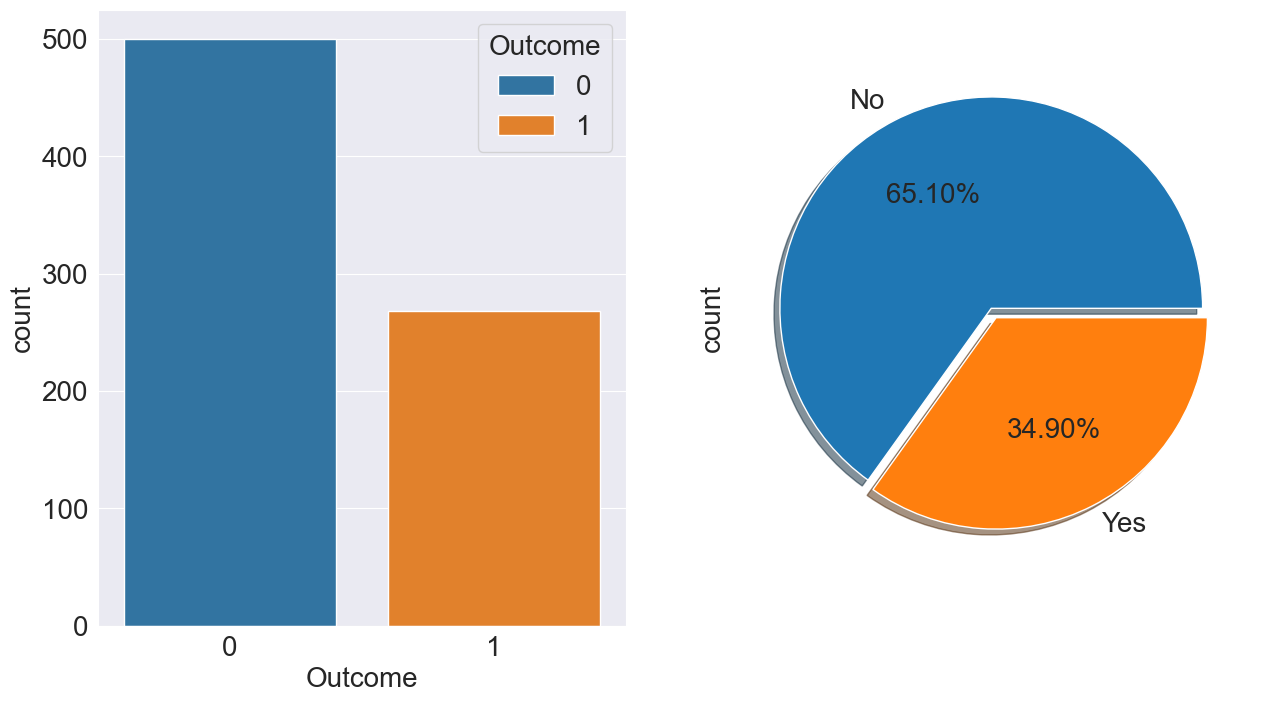

In [7]:
fig, ax = plt.subplots(1, 2)
sns.countplot(data=df, x="Outcome", ax=ax[0], hue="Outcome")
df["Outcome"].value_counts().plot.pie(explode=[0.05,0], autopct="%1.2f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])
plt.show()

**Majority (65.10%)** patients do not have diabetes.

## Pregnancies

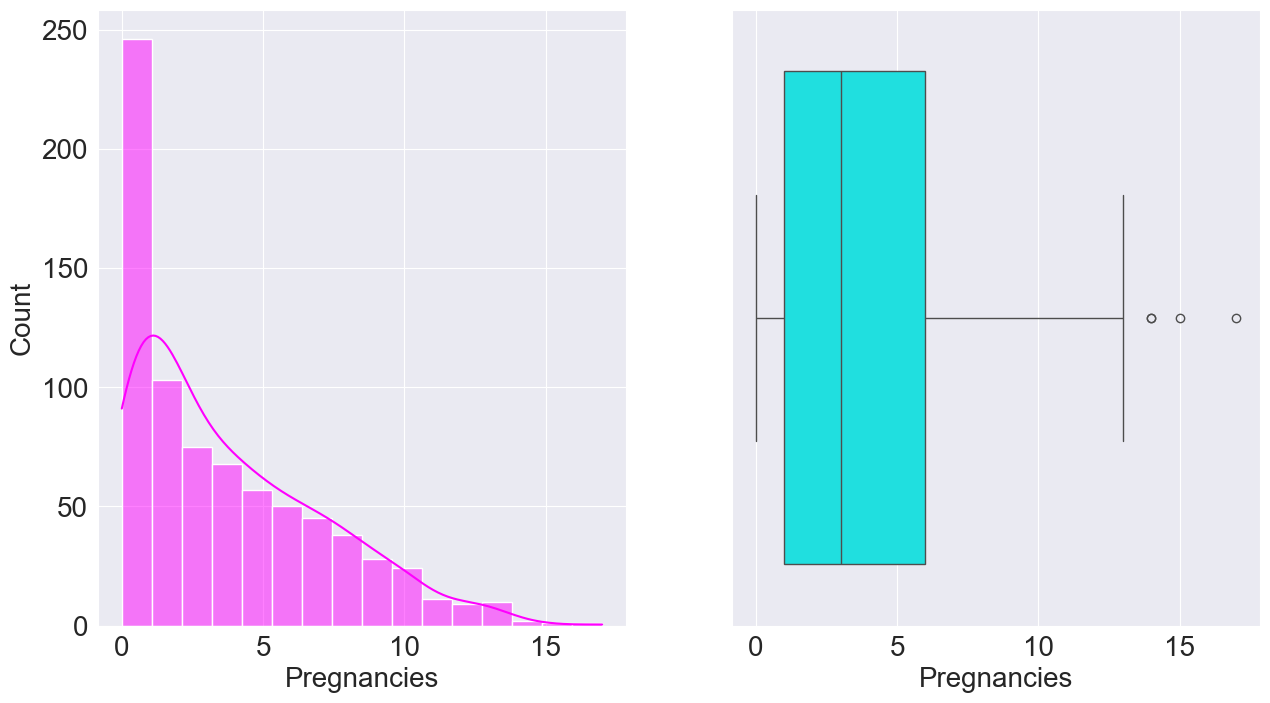

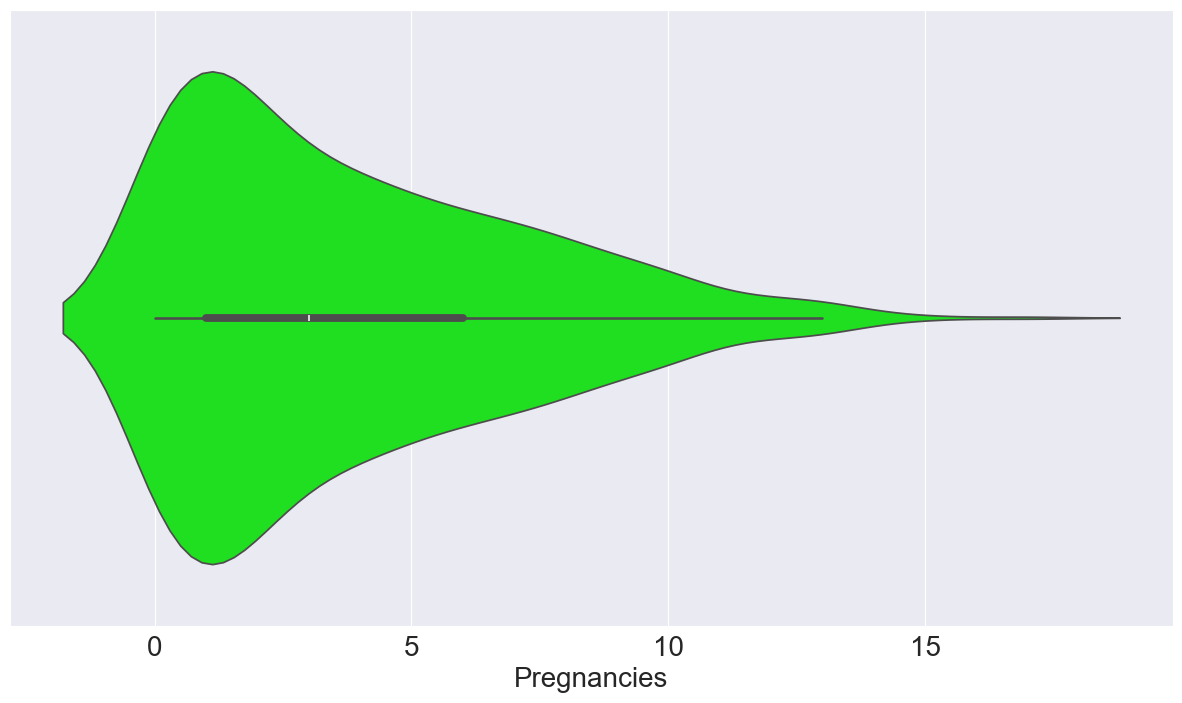

In [8]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="Pregnancies", ax=ax2, color='lime')
plt.show()

**Observation:-** The Outliers for pregnancies start after 12.75.

In [9]:
print(f"Minimum of Pregnancies: {df.Pregnancies.min()}")
print(f"Median of Pregnancies: {df.Pregnancies.median()}")
print(f"Maximum of Pregnancies: {df.Pregnancies.max()}")

Minimum of Pregnancies: 0
Median of Pregnancies: 3.0
Maximum of Pregnancies: 17


### Glucose

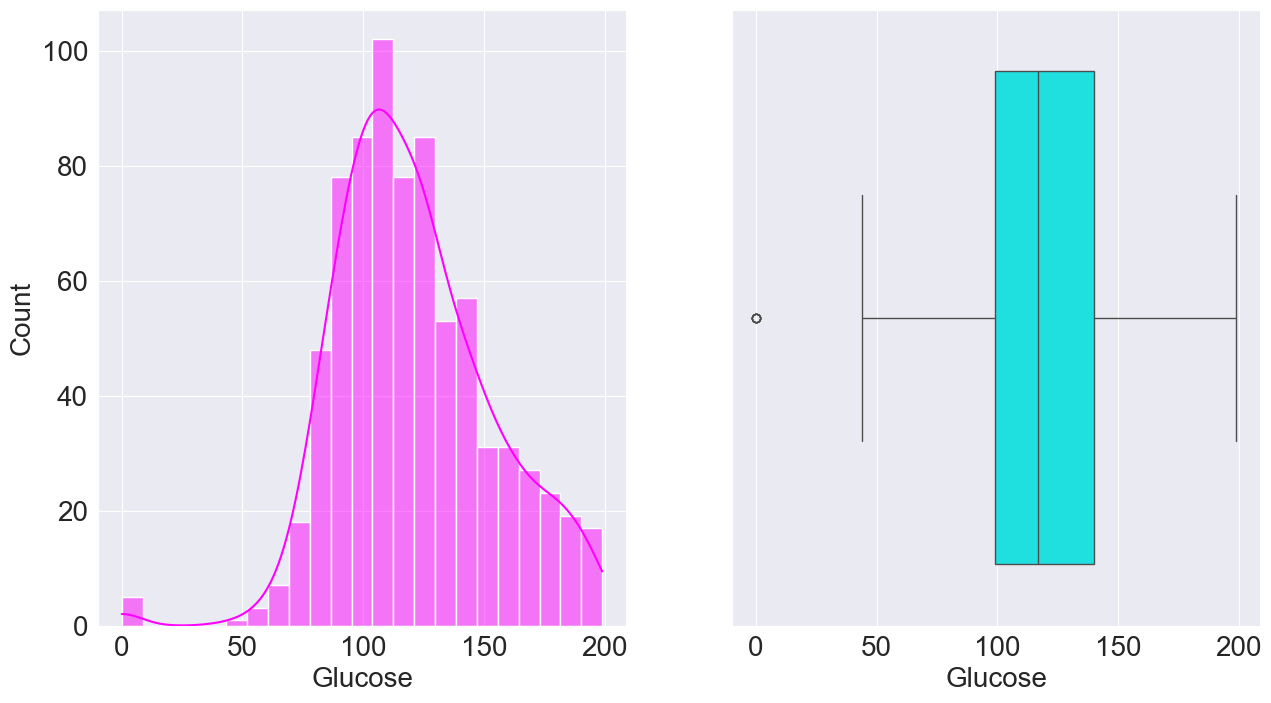

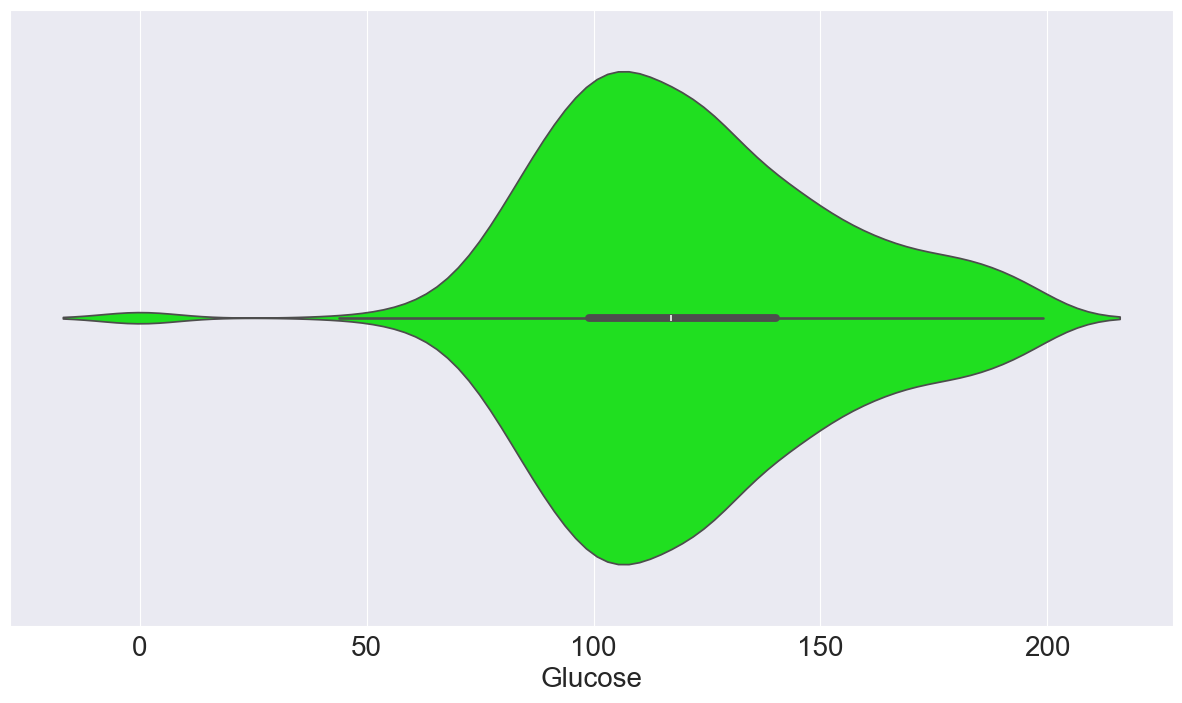

In [10]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="Glucose", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="Glucose", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="Glucose", ax=ax2, color='lime')
plt.show()

In [11]:
print(f"Minimum of Glucose: {df.Glucose.min()}")
print(f"Median of Glucose: {df.Glucose.median()}")
print(f"Mean of Glucose: {df.Glucose.mean()}")
print(f"Maximum of Glucose: {df.Glucose.max()}")
print(f"Rows with Glucose value of 0: {df[df.Glucose==0].shape[0]}")

Minimum of Glucose: 0
Median of Glucose: 117.0
Mean of Glucose: 120.89453125
Maximum of Glucose: 199
Rows with Glucose value of 0: 5


**Here, there are only 1 outlier i.e. 0. Also glucose level can't be at 0 mmol/L. Thus it is an inappropriate value which needs to be removed.**

#### Replacing 0 values with median of field

In [12]:
df.Glucose = df.Glucose.replace(0, df.Glucose.median())
print(f"Minimum of Glucose after replacing 0: {df.Glucose.min()}")

Minimum of Glucose after replacing 0: 44


#### After removing 0 values

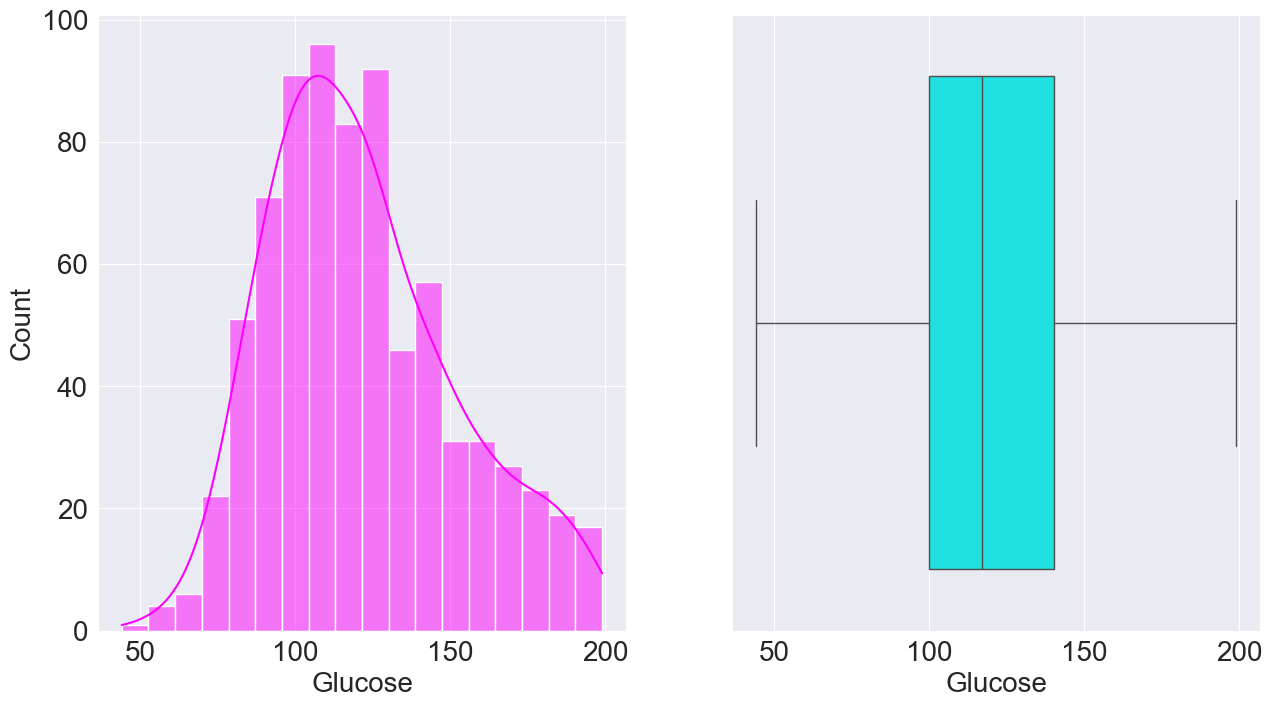

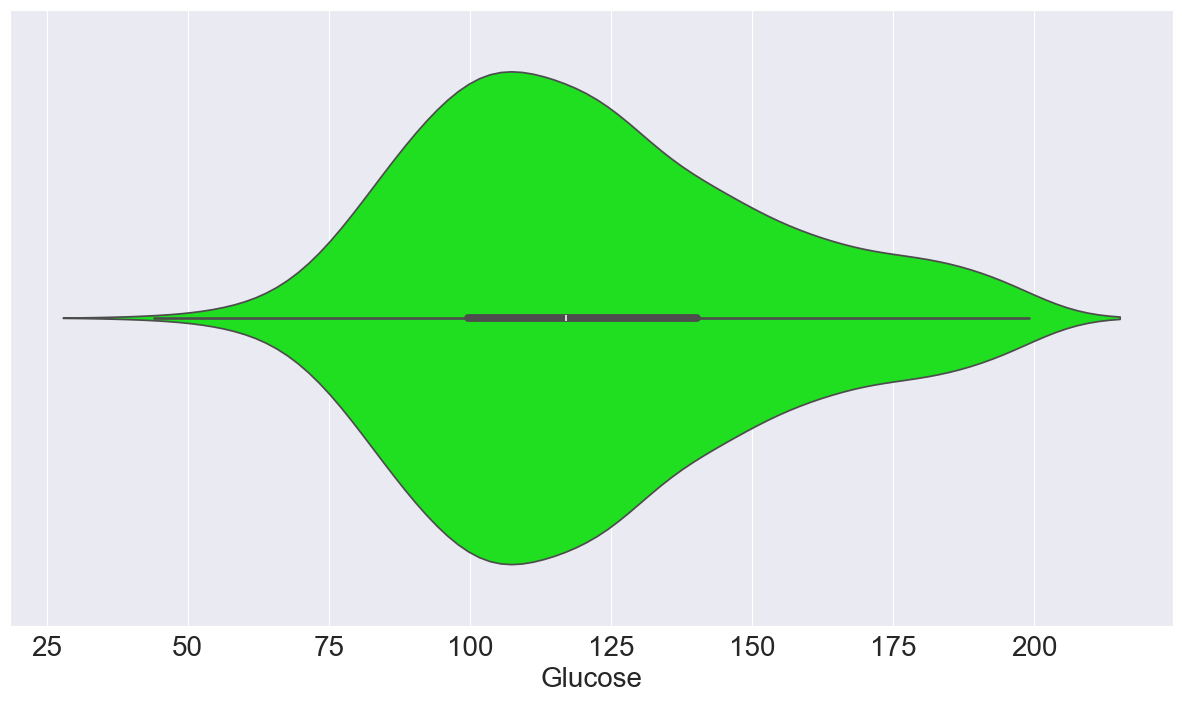

In [13]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="Glucose", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="Glucose", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="Glucose", ax=ax2, color='lime')
plt.show()

### Blood Pressure

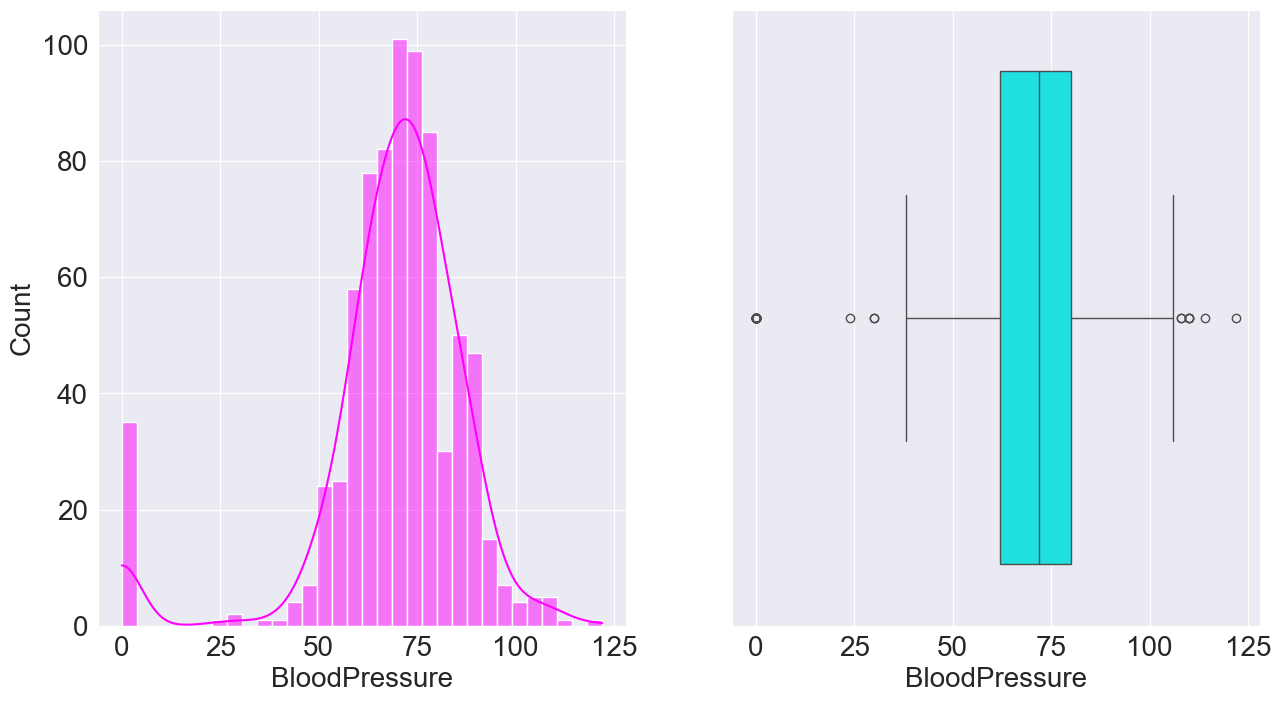

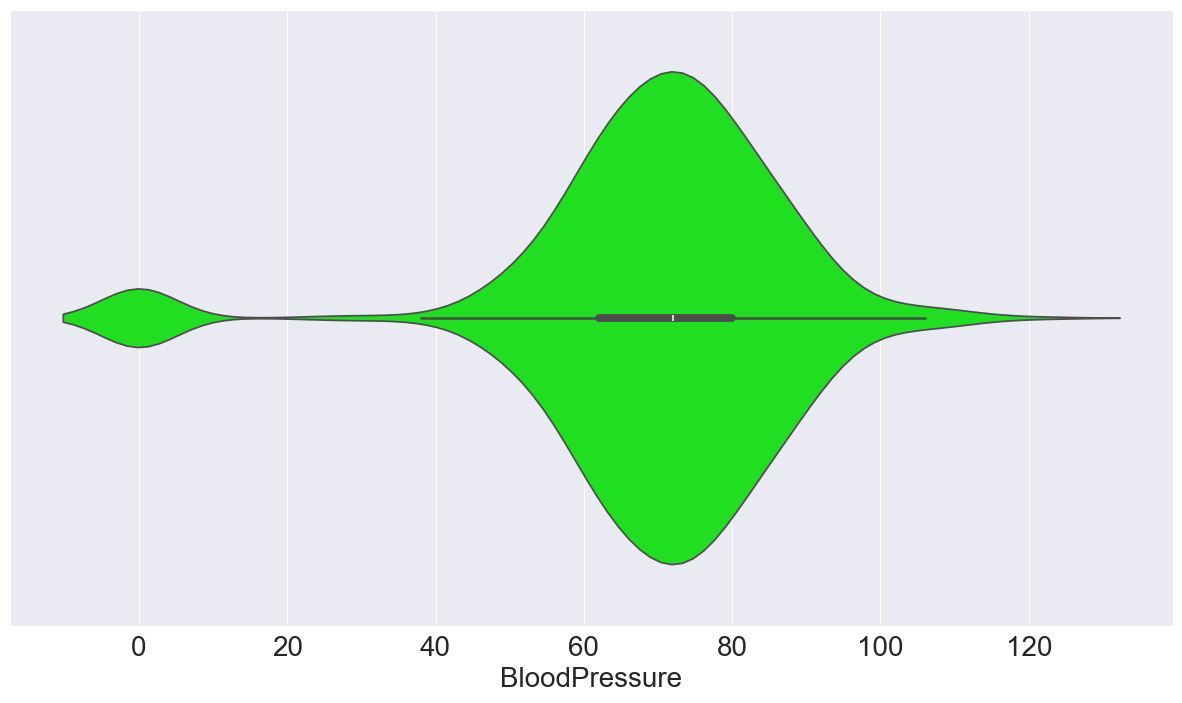

In [14]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="BloodPressure", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="BloodPressure", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="BloodPressure", ax=ax2, color='lime')
plt.show()

In [15]:
print(f"Minimum of Blood Pressure: {df.BloodPressure.min()}")
print(f"Median of Blood Pressure: {df.BloodPressure.median()}")
print(f"Mean of Blood Pressure: {df.BloodPressure.mean()}")
print(f"Maximum of Blood Pressure: {df.BloodPressure.max()}")

print(f"Rows with Blood Pressure value of 0: {df[df.BloodPressure==0].shape[0]}")

Minimum of Blood Pressure: 0
Median of Blood Pressure: 72.0
Mean of Blood Pressure: 69.10546875
Maximum of Blood Pressure: 122
Rows with Blood Pressure value of 0: 35


#### Replacing 0 values with median


In [16]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
print(f"Minimum of Skin Thickness after replacing 0: {df.BloodPressure.min()}")

Minimum of Skin Thickness after replacing 0: 24


#### After removing outliers

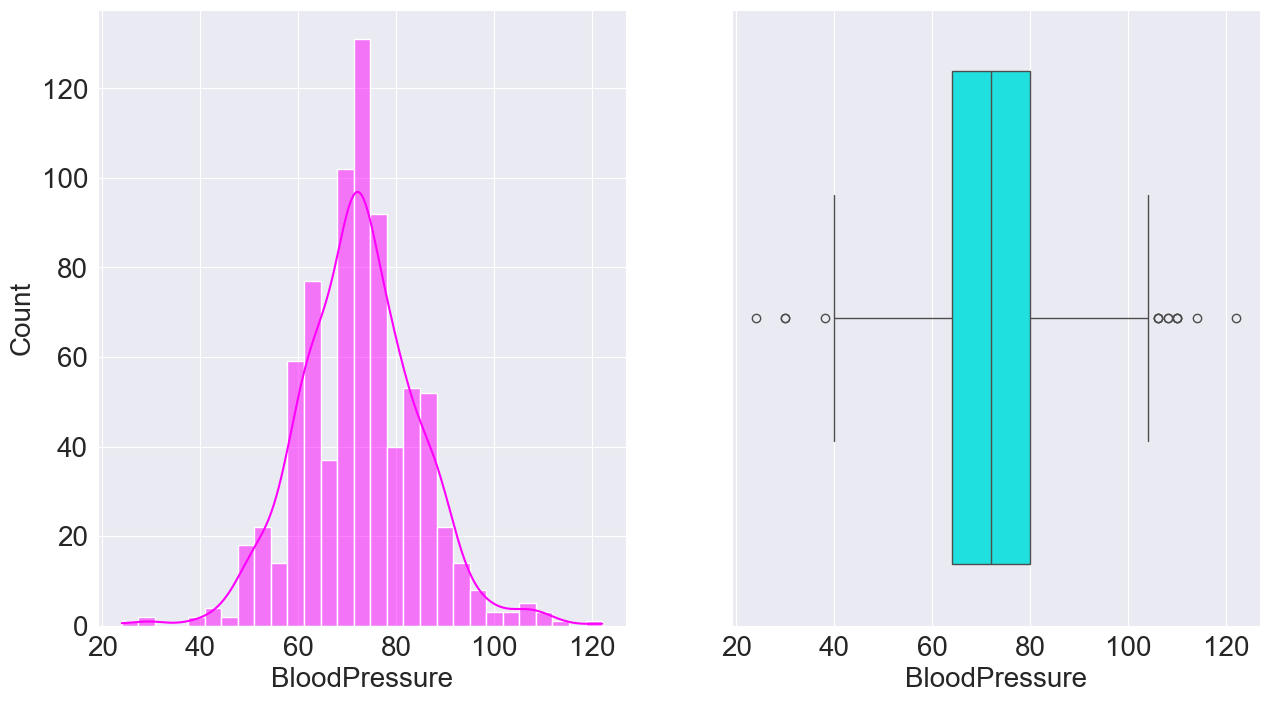

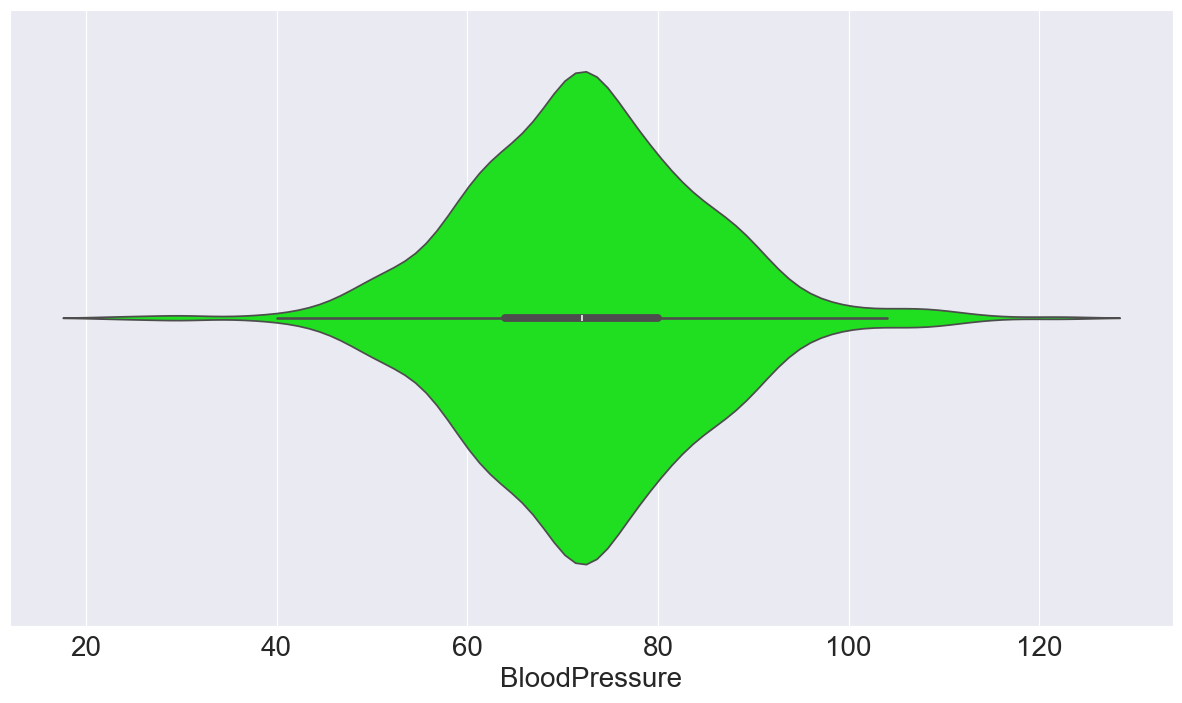

In [17]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="BloodPressure", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="BloodPressure", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="BloodPressure", ax=ax2, color='lime')
plt.show()

### Skin Thickness

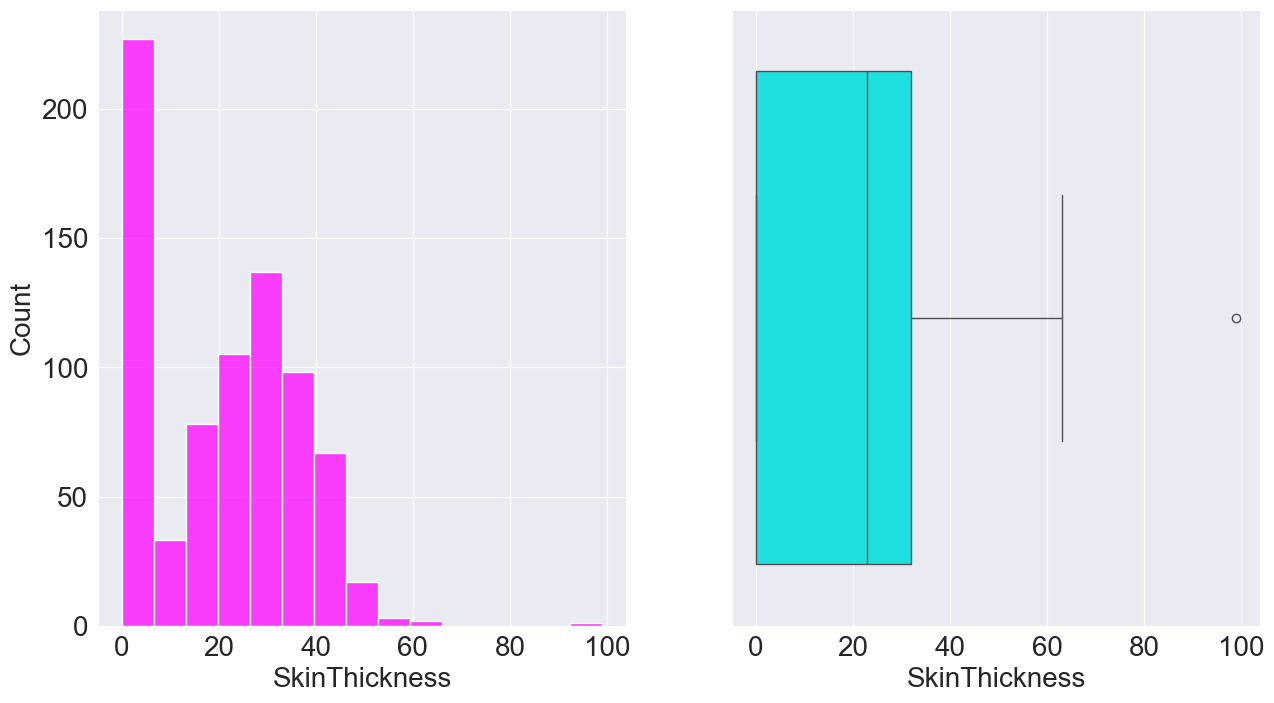

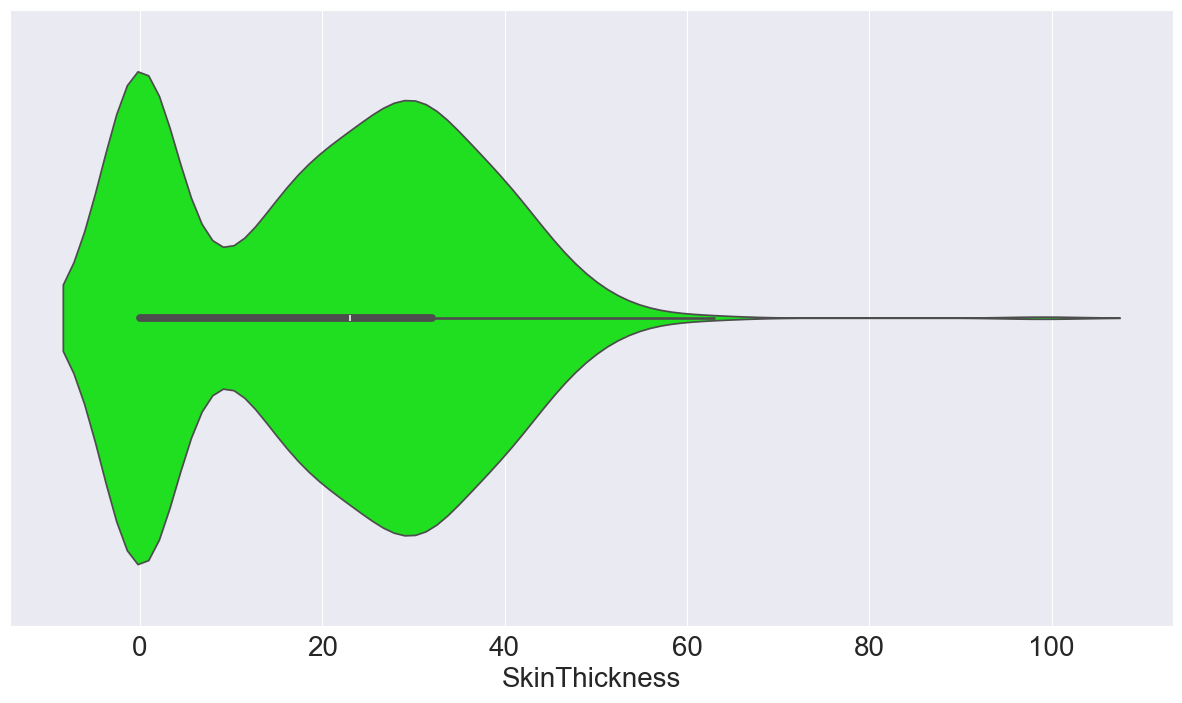

In [18]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="SkinThickness", ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="SkinThickness", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="SkinThickness", ax=ax2, color='lime')
plt.show()

In [19]:
print(f"Minimum of Skin Thickness: {df.SkinThickness.min()}")
print(f"Median of Skin Thickness: {df.SkinThickness.median()}")
print(f"Mean of Skin Thickness: {df.SkinThickness.mean()}")
print(f"Maximum of Skin Thickness: {df.SkinThickness.max()}")

print(f"Rows with Skin Thickness value greater than 80: {df[df.SkinThickness>80].shape[0]}")
print(f"Rows with Skin Thickness value 0: {df[df.SkinThickness==0].shape[0]}")

Minimum of Skin Thickness: 0
Median of Skin Thickness: 23.0
Mean of Skin Thickness: 20.536458333333332
Maximum of Skin Thickness: 99
Rows with Skin Thickness value greater than 80: 1
Rows with Skin Thickness value 0: 227


#### Replacing outlier with median of field

In [20]:
df.SkinThickness = df.SkinThickness.replace(99, df.SkinThickness.median())
print(f"Maximum of Skin Thickness after replacing outlier: {df.SkinThickness.max()}")

Maximum of Skin Thickness after replacing outlier: 63


#### Replacing 0 values with 0.1

In [21]:
df.SkinThickness = df.SkinThickness.replace(0,0.1)
print(f"Minimum of Skin Thickness after replacing 0: {df.SkinThickness.min()}")

Minimum of Skin Thickness after replacing 0: 0.1


#### After removing outliers

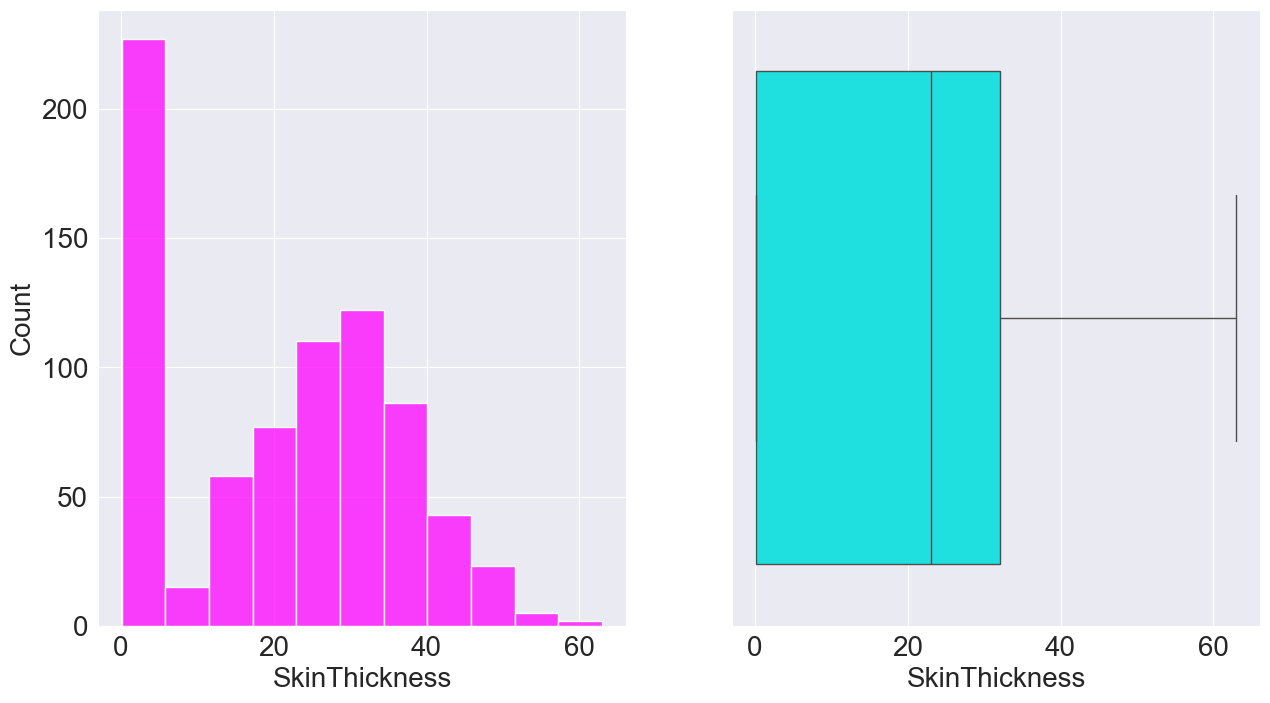

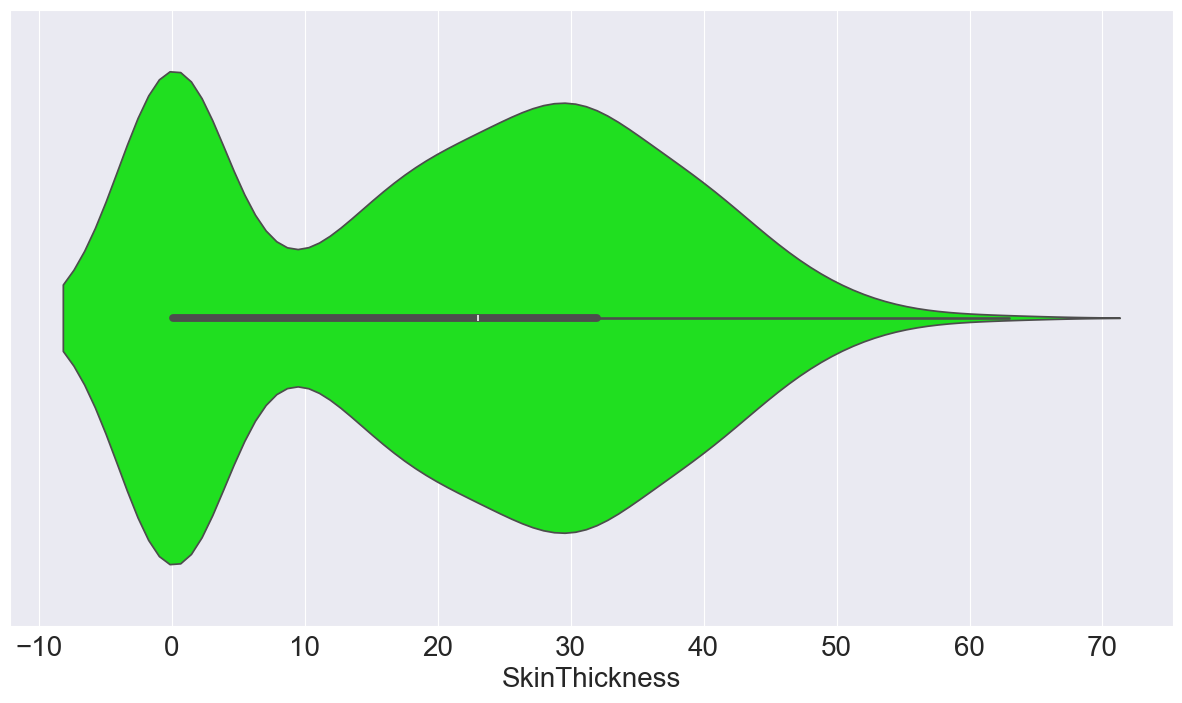

In [22]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="SkinThickness", ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="SkinThickness", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="SkinThickness", ax=ax2, color='lime')
plt.show()

### Insulin

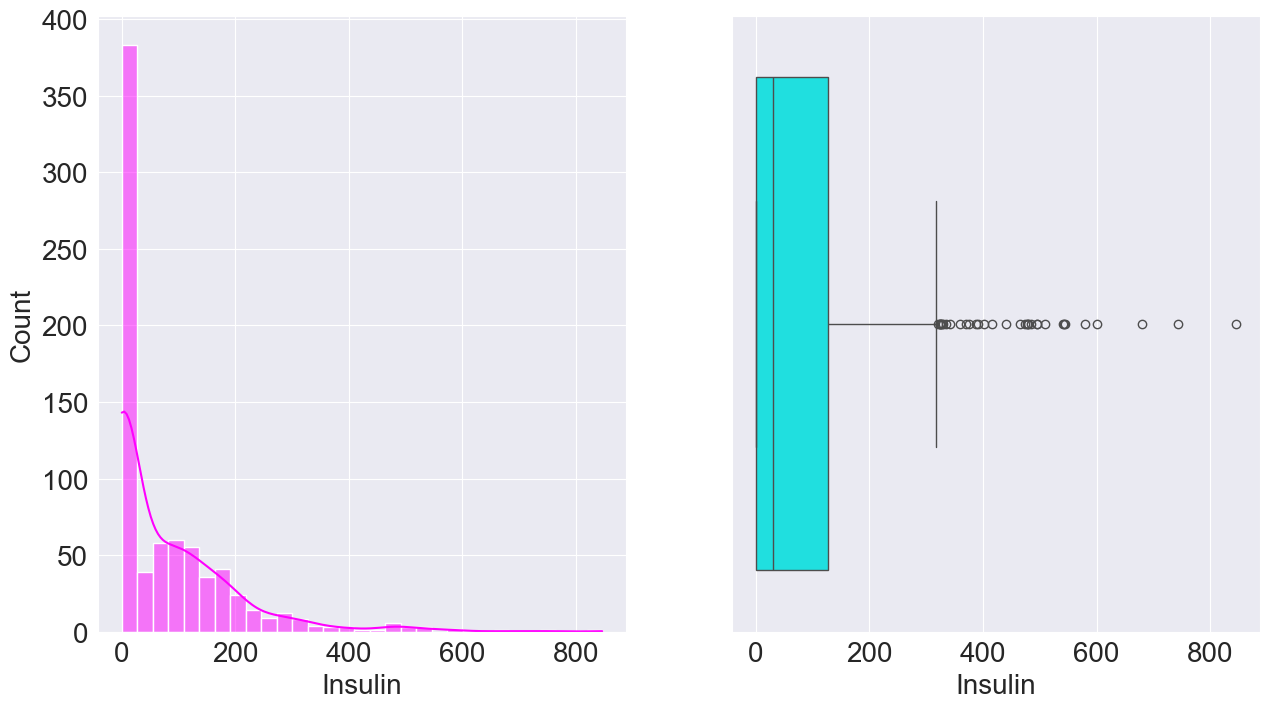

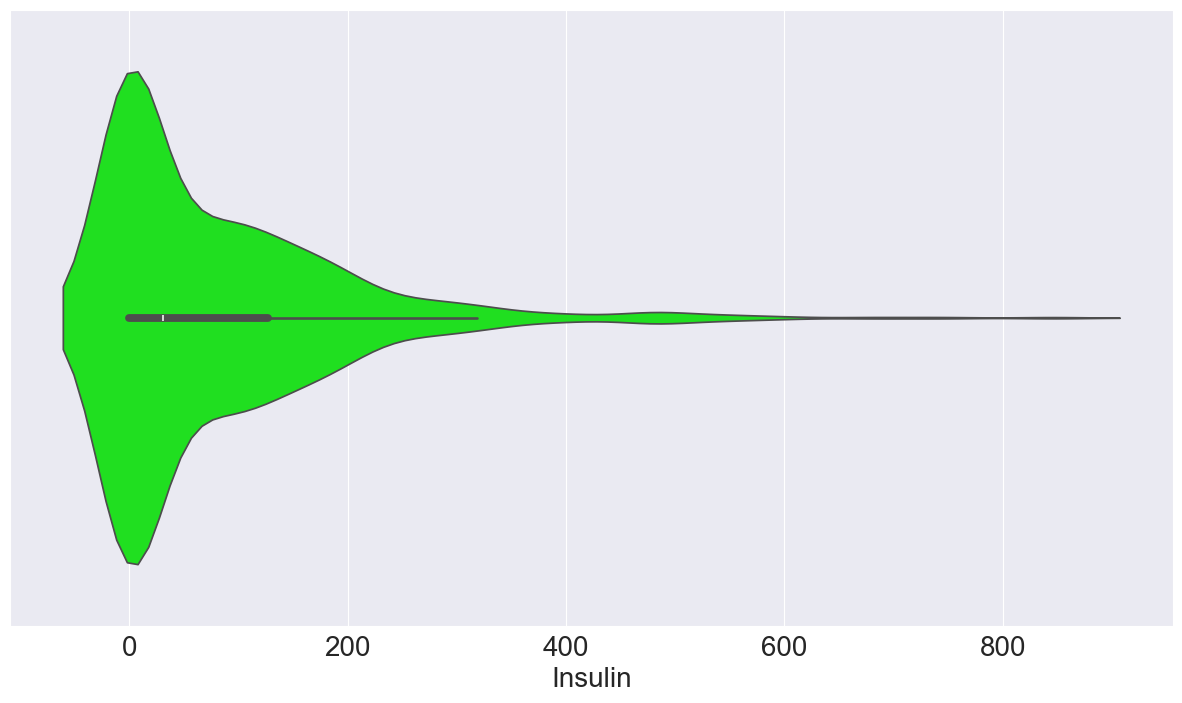

In [23]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="Insulin", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="Insulin", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="Insulin", ax=ax2, color='lime')
plt.show()

In [24]:
print(f"Minimum of Insulin: {df.Insulin.min()}")
print(f"Median of Insulin: {df.Insulin.median()}")
print(f"Mean of Insulin: {df.Insulin.mean()}")
print(f"Maximum of Insulin: {df.Insulin.max()}")

print(f"Rows with Insulin value of 0: {df[df.Insulin==0].shape[0]}")

Minimum of Insulin: 0
Median of Insulin: 30.5
Mean of Insulin: 79.79947916666667
Maximum of Insulin: 846
Rows with Insulin value of 0: 374


#### Replacing 0 values with median of field

In [25]:
df.Insulin = df.Insulin.replace(0, df.Insulin.median())
print(f"Minimum of Insulin after replacing 0: {df.Insulin.min()}")

Minimum of Insulin after replacing 0: 14.0


#### After replacing 0 values

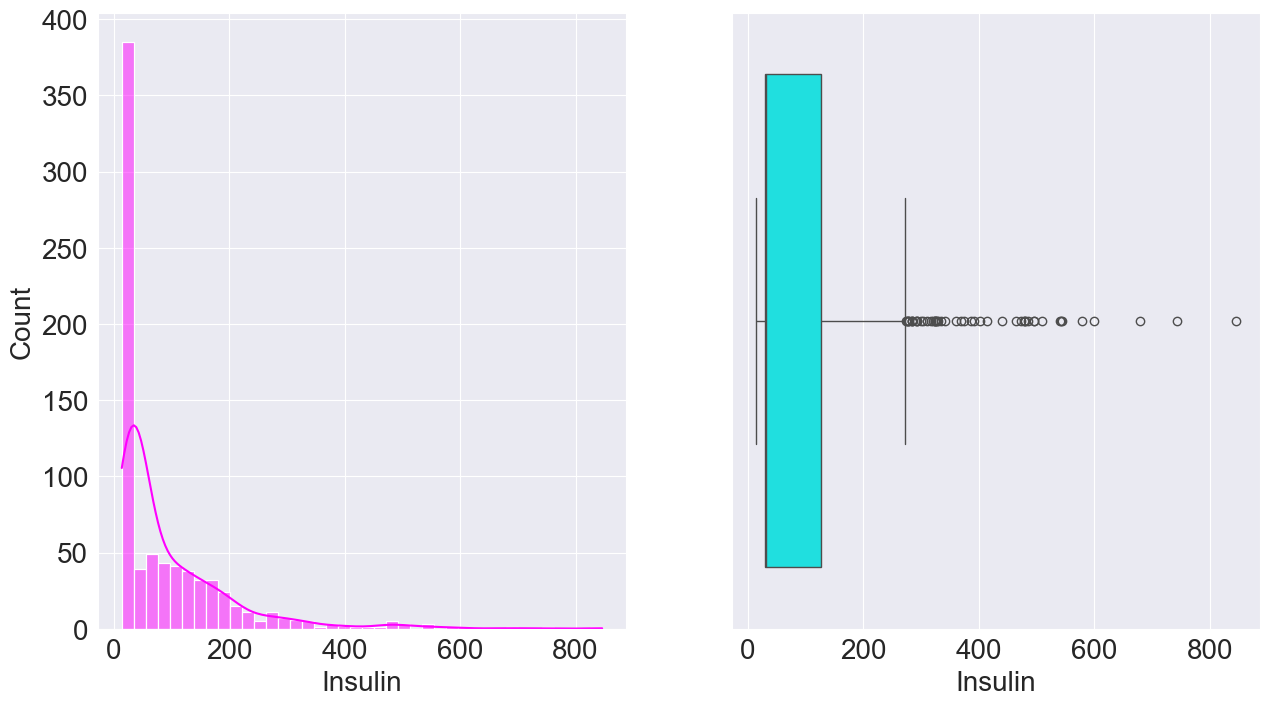

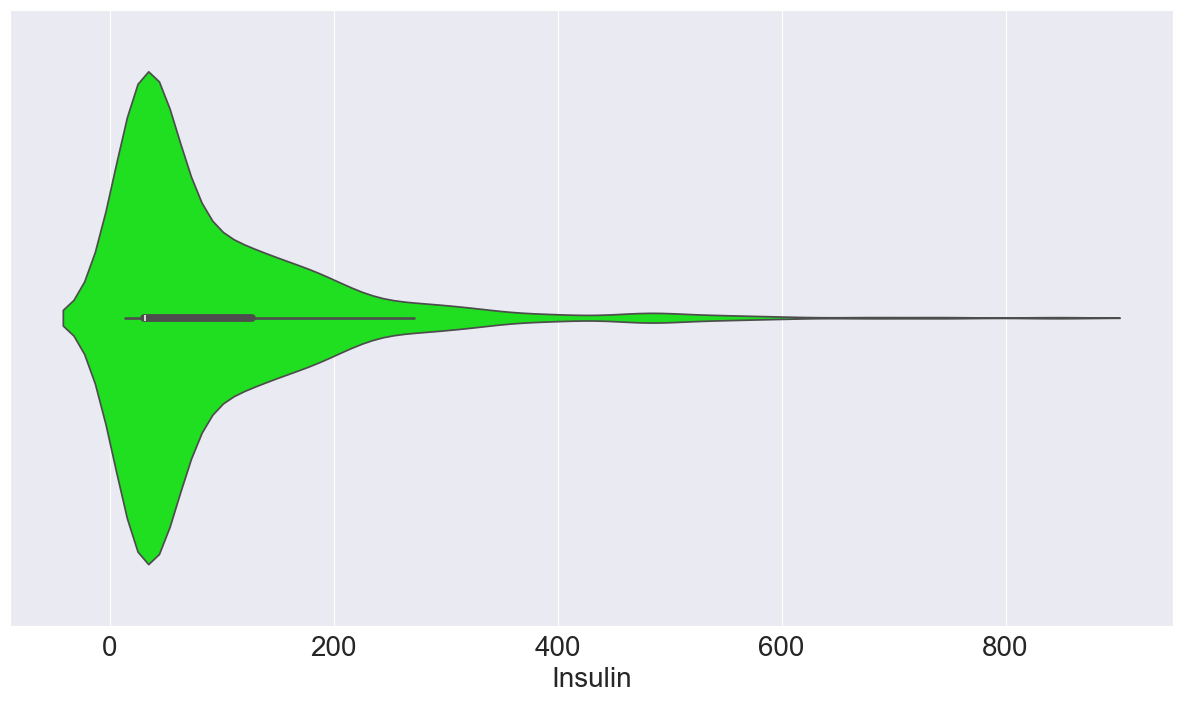

In [26]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="Insulin", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="Insulin", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="Insulin", ax=ax2, color='lime')
plt.show()

### BMI

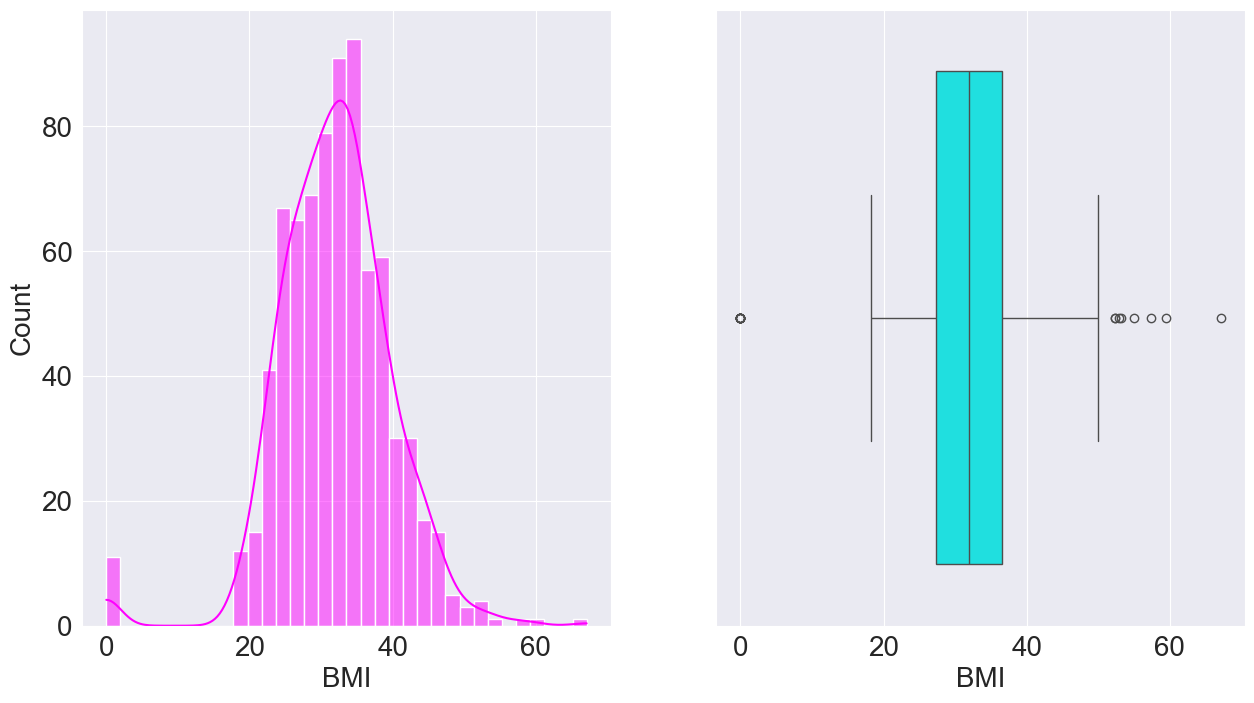

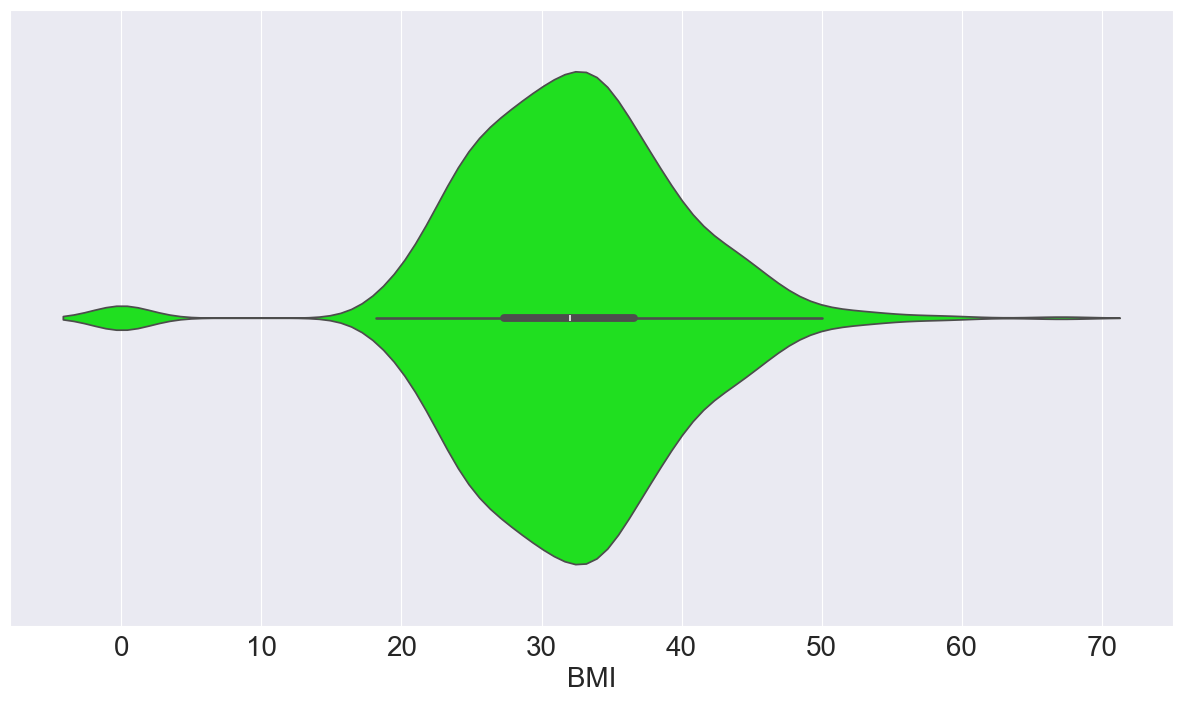

In [27]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="BMI", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="BMI", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="BMI", ax=ax2, color='lime')
plt.show()

In [28]:
print(f"Median of BMI: {df.BMI.median()}")
print(f"Maximum of BMI: {df.BMI.max()}")
print(f"Minimum of BMI: {df.BMI.min()}")
print(f"Mean of BMI: {df.BMI.mean()}")

print(f"Rows with BMI value of 0: {df[df.BMI==0].shape[0]}")

Median of BMI: 32.0
Maximum of BMI: 67.1
Minimum of BMI: 0.0
Mean of BMI: 31.992578124999998
Rows with BMI value of 0: 11


#### Replacing 0 values with median of field

In [29]:
df.BMI = df.BMI.replace(0, df.BMI.median())
print(f"Minimum of BMI after replacing 0: {df.BMI.min()}")

Minimum of BMI after replacing 0: 18.2


#### After replacing 0 values

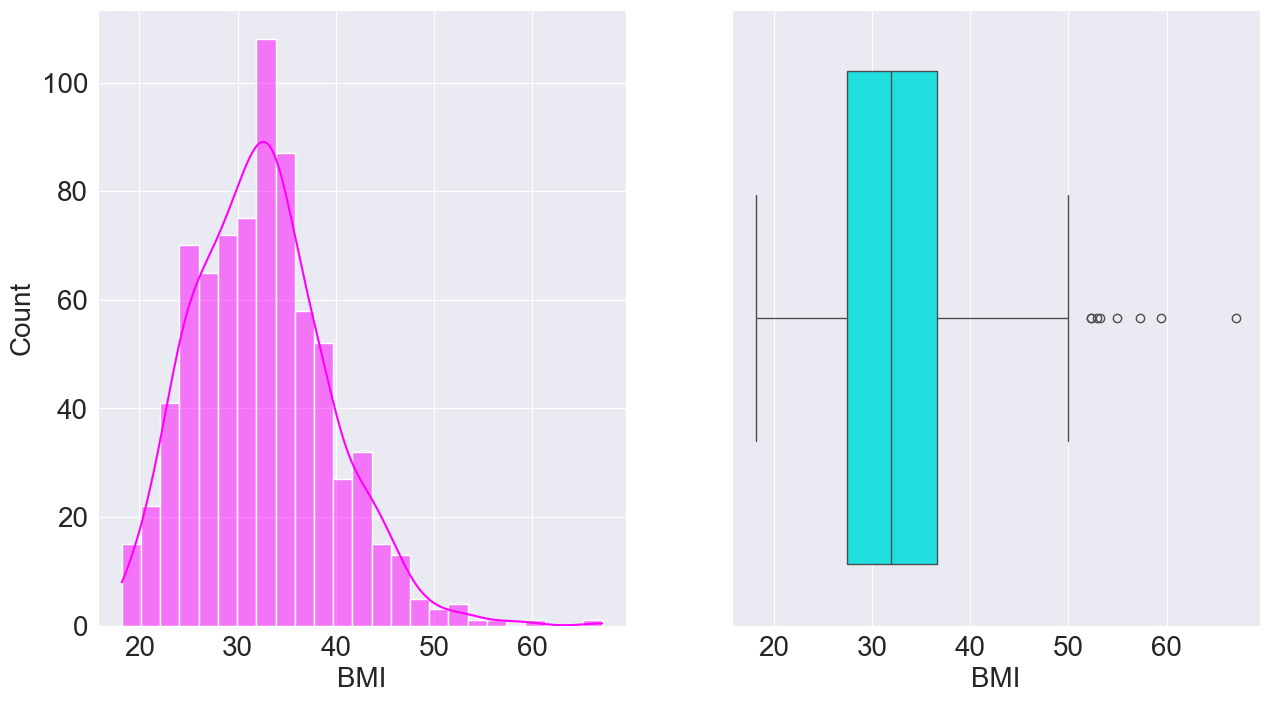

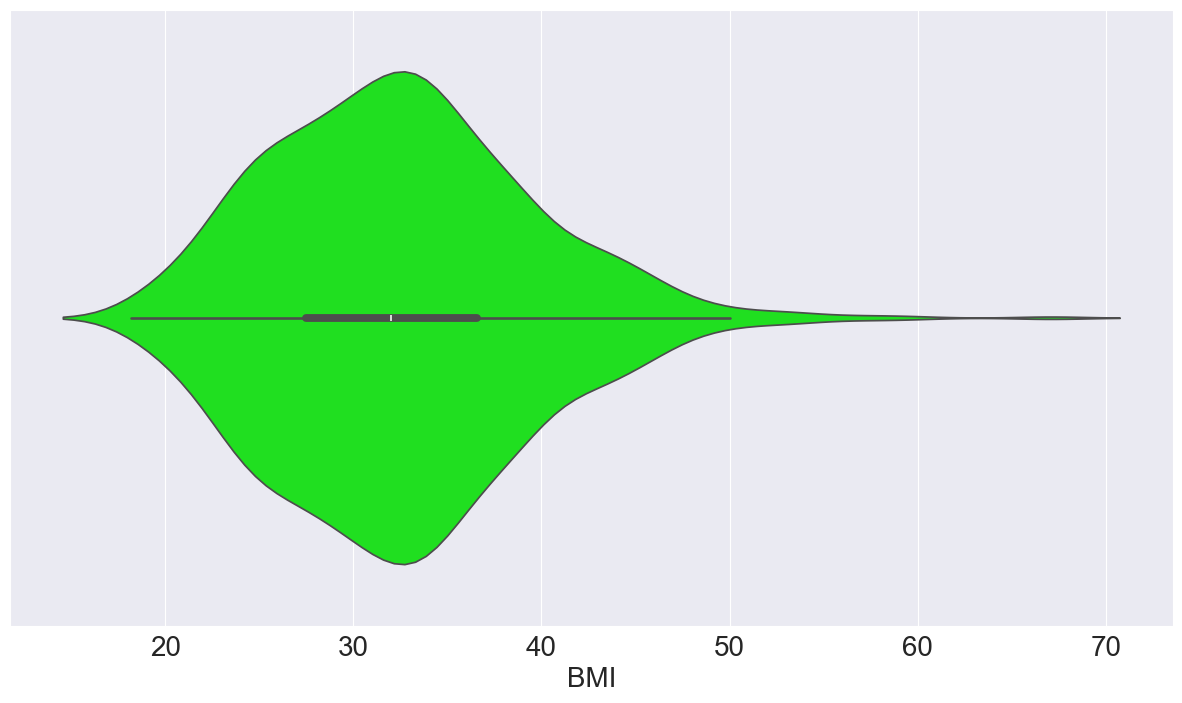

In [30]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="BMI", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="BMI", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="BMI", ax=ax2, color='lime')
plt.show()

### Diabetes Pedigree Function

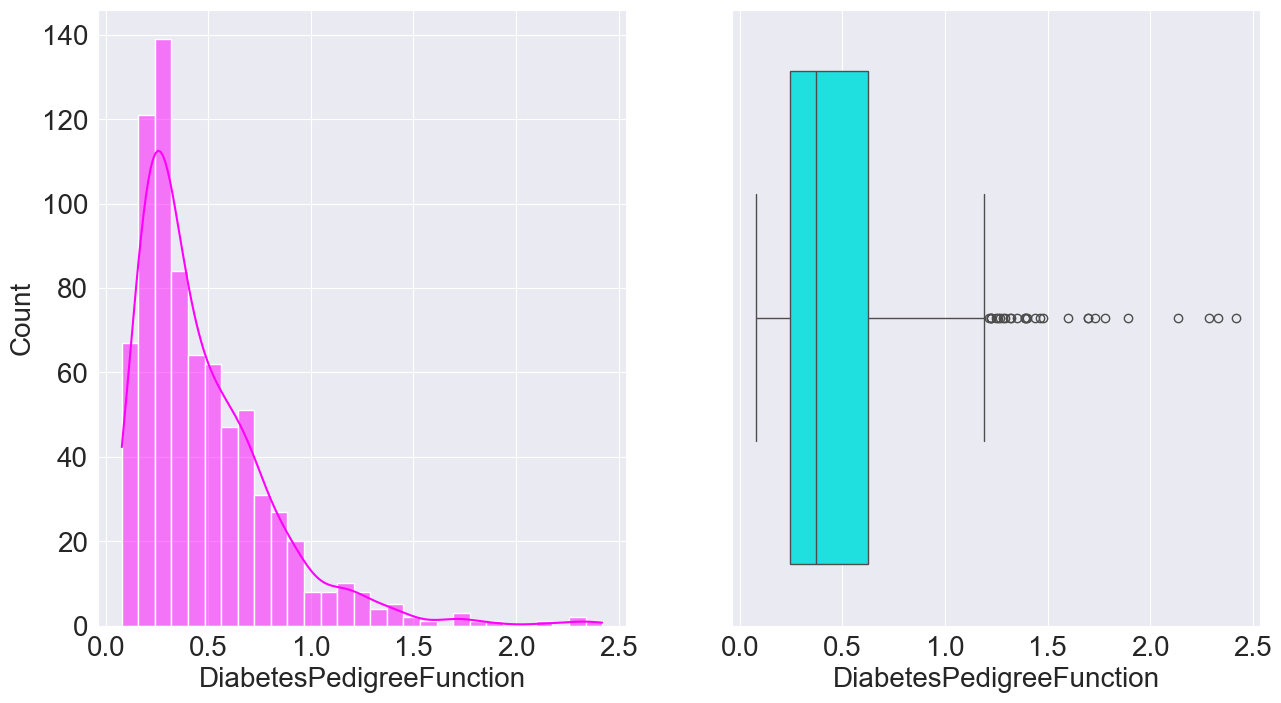

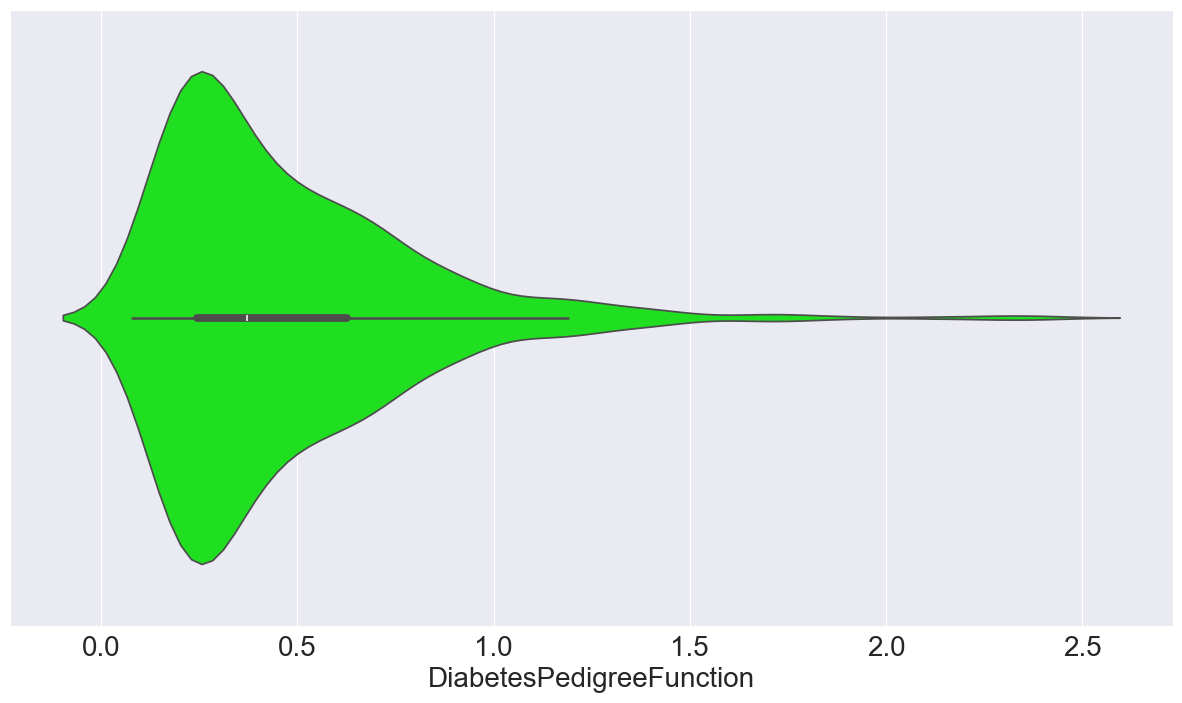

In [31]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="DiabetesPedigreeFunction", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="DiabetesPedigreeFunction", ax=ax2, color='lime')
plt.show()

In [32]:
print(f"Minimum of Diabetes Pedigree Function: {df.DiabetesPedigreeFunction.min()}")
print(f"Median of Diabetes Pedigree Function: {df.DiabetesPedigreeFunction.median()}")
print(f"Mean of Diabetes Pedigree Function: {df.DiabetesPedigreeFunction.mean()}")
print(f"Maximum of Diabetes Pedigree Function: {df.DiabetesPedigreeFunction.max()}")

Minimum of Diabetes Pedigree Function: 0.078
Median of Diabetes Pedigree Function: 0.3725
Mean of Diabetes Pedigree Function: 0.47187630208333325
Maximum of Diabetes Pedigree Function: 2.42


### Age

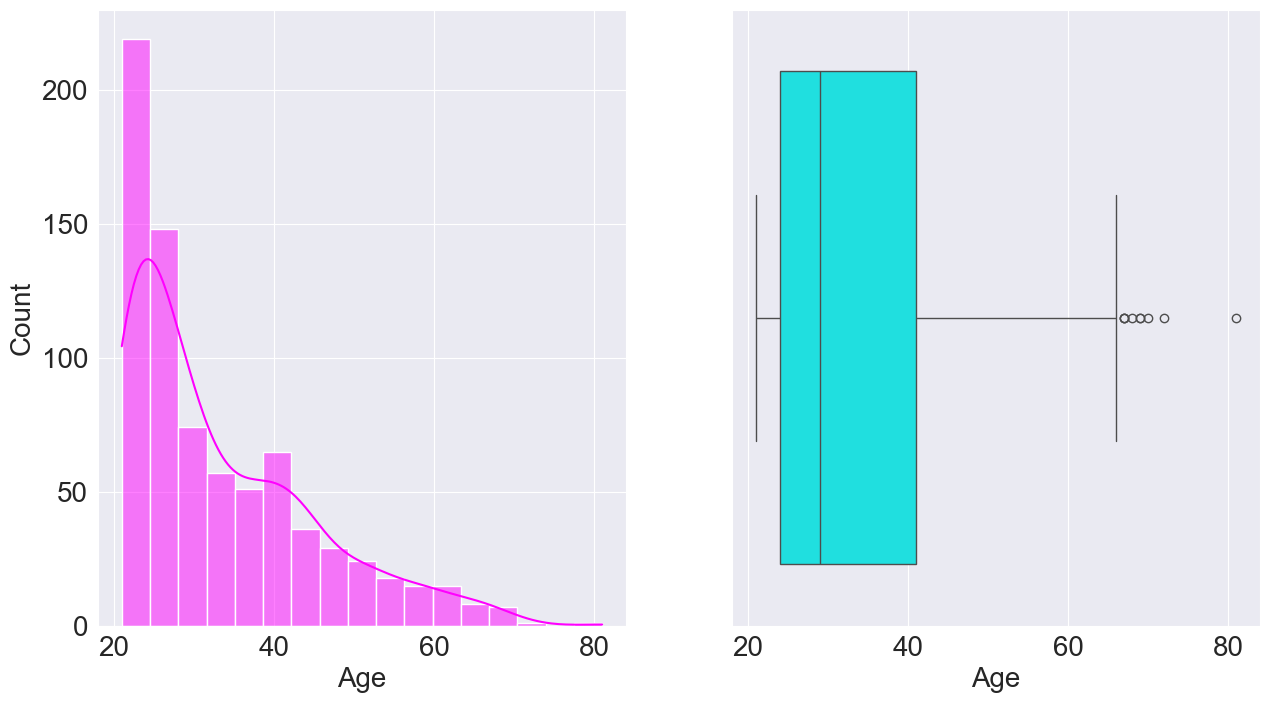

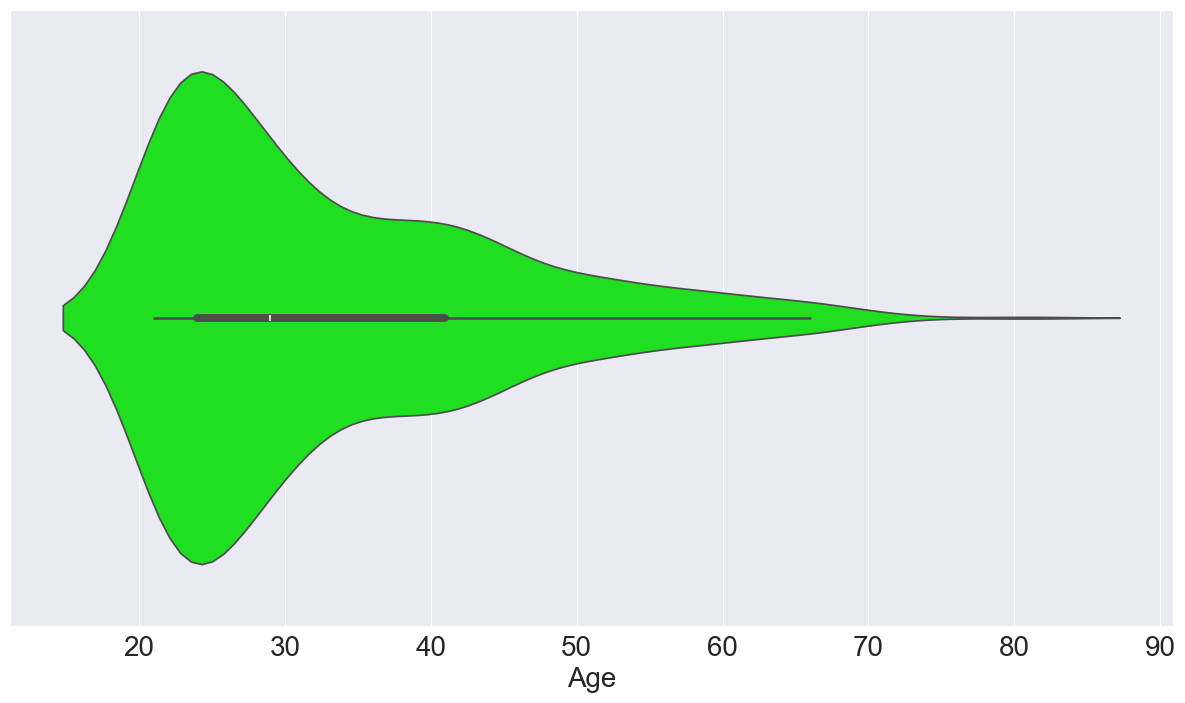

In [33]:
fig1, ax1 = plt.subplots(1,2)
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x="Age", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="Age", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="Age", ax=ax2, color='lime')
plt.show()

In [34]:
print(f"Minimum of Age: {df.Age.min()}")
print(f"Median of Age: {df.Age.median()}")
print(f"Mean of Age: {df.Age.mean()}")
print(f"Maximum of Age: {df.Age.max()}")

Minimum of Age: 21
Median of Age: 29.0
Mean of Age: 33.240885416666664
Maximum of Age: 81


## Bivariate Analysis

### Analysis of Blood Pressure and Outcome

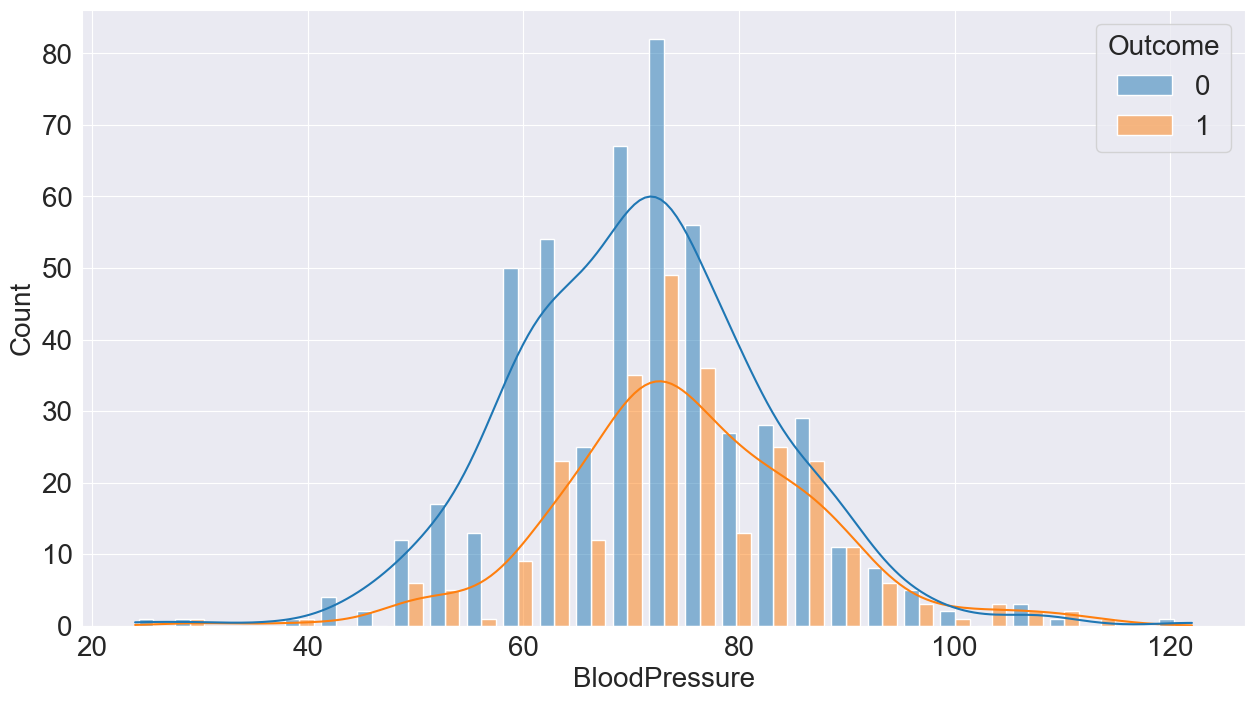

In [35]:
sns.histplot(data=df, x="BloodPressure", hue="Outcome", shrink=0.8, multiple = "dodge", kde=True);

From the above plot, we don't see any positive or negative linear correlation. There is non-linearity in the graph.
Thus Blood Pressure is not a cause of having diabetes in the person.

### Analysis of Insulin and Outcome

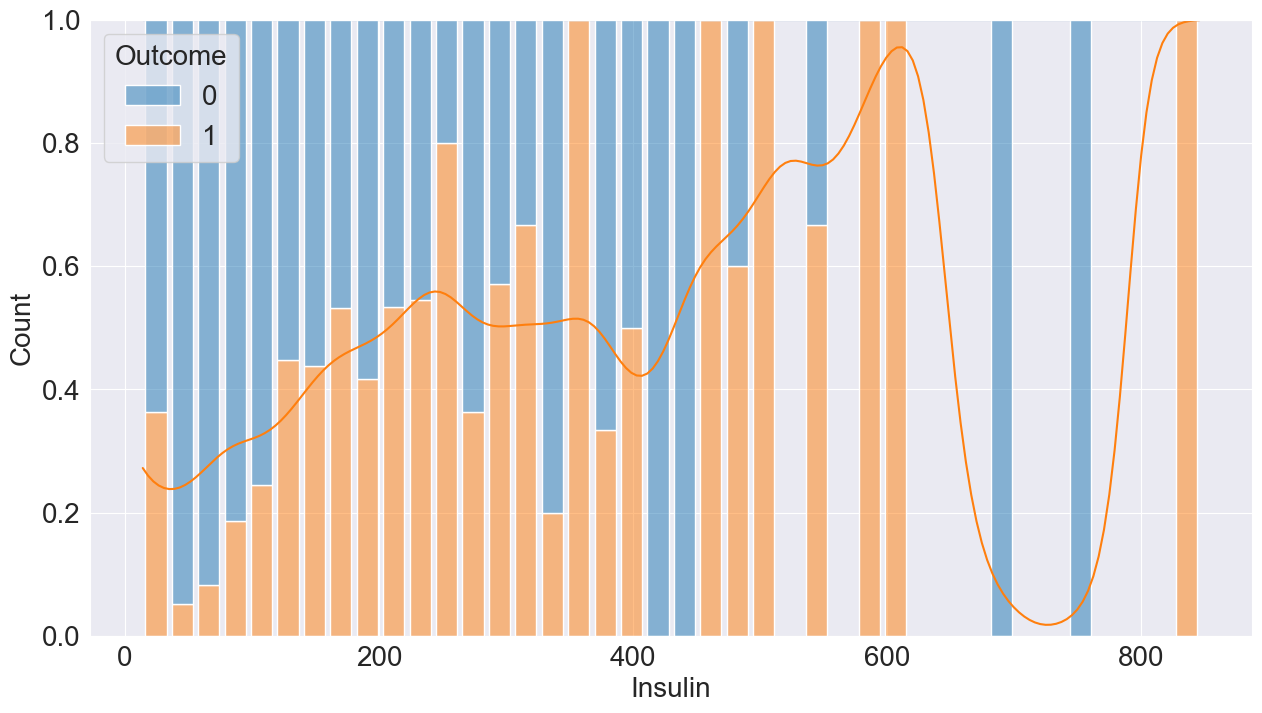

In [36]:
sns.histplot(data=df, x="Insulin", hue="Outcome", shrink=0.8, multiple = "fill", kde=True);

From the above plot, we don't see any positive or negative linear correlation. There is non-linearity in the graph.
Thus Insulin is not a cause of having diabetes in the person.

### Analysis of Skin Thickness and Outcome

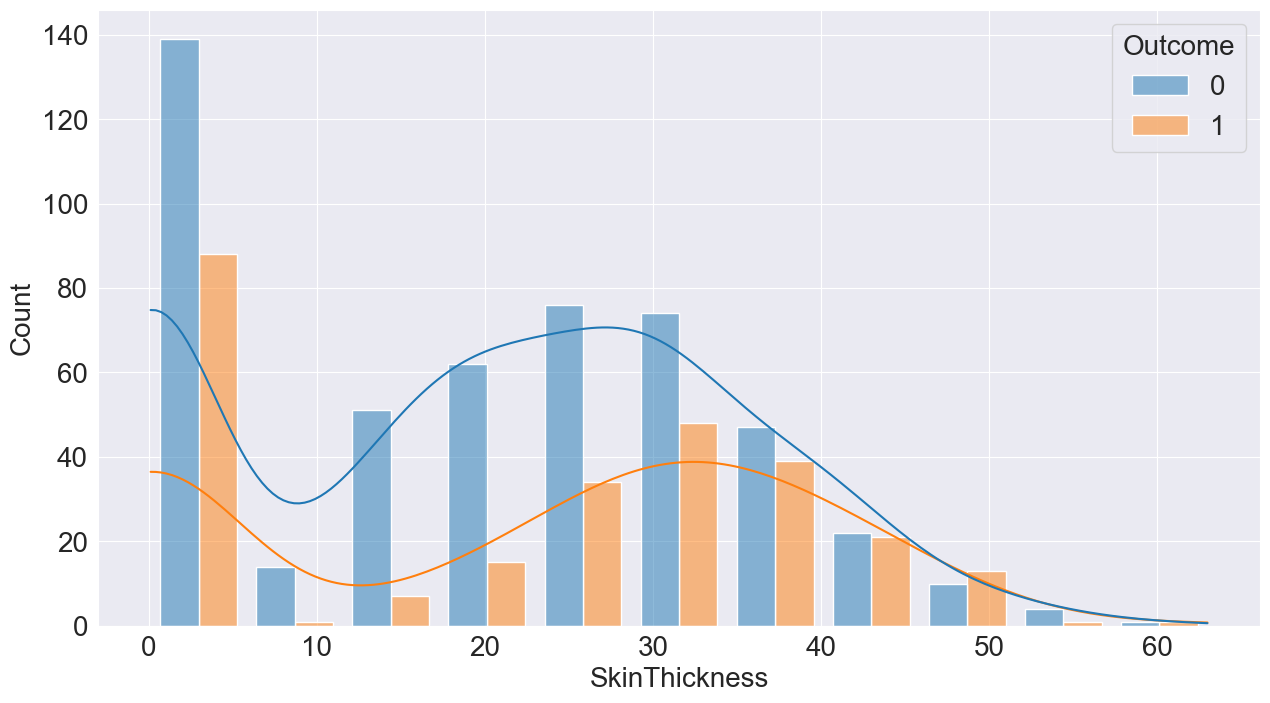

In [37]:
sns.histplot(data=df, x="SkinThickness", hue="Outcome", shrink=0.8, multiple = "dodge", kde=True);

From the above plot, we don't see any positive or negative linear correlation. There is non-linearity in the graph.
Thus Skin Thickness is not a cause of having diabetes in the person.

### Analysis of Glucose and Outcome

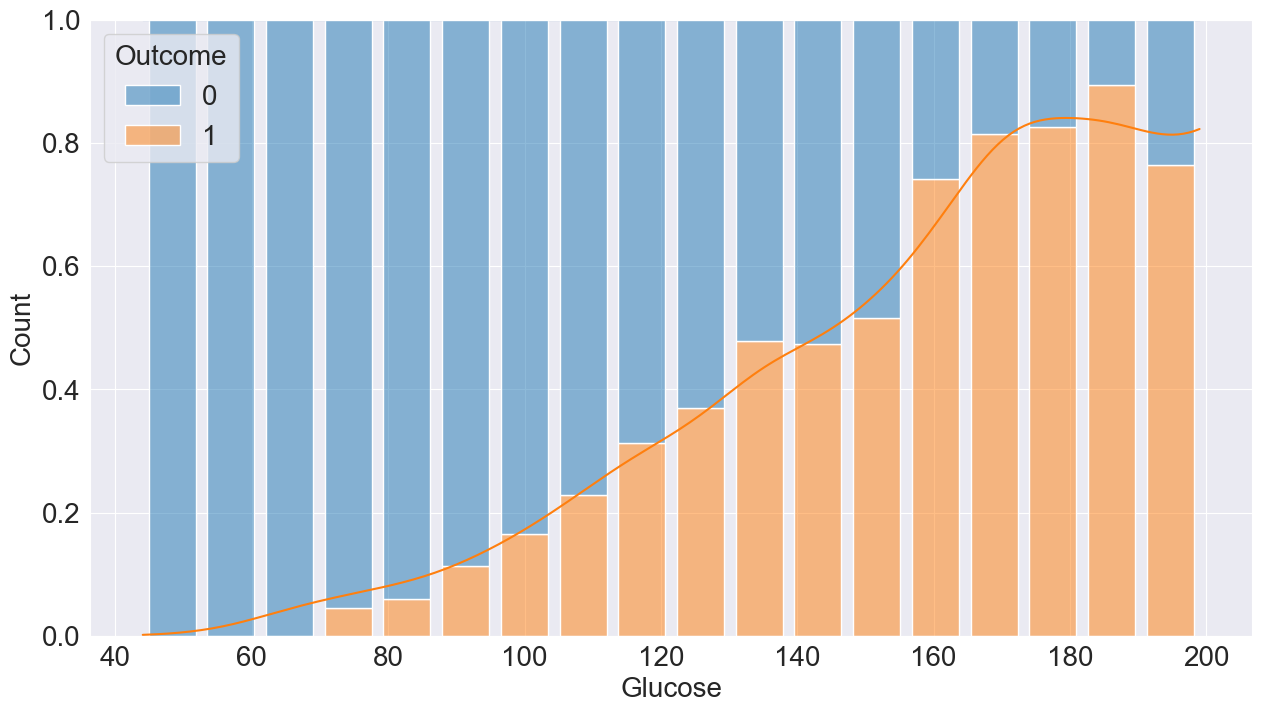

In [38]:
sns.histplot(data=df, x="Glucose", hue="Outcome", shrink=0.8, multiple = "fill", kde=True);

From the above plot, we see a **positive linear correlation.**
  * As the value of Glucose increases, the count of patients having diabetes increases.
  * Thus Glucose level has significant positive relation with diabetes.

### Analysis of Pregnancies and Outcome

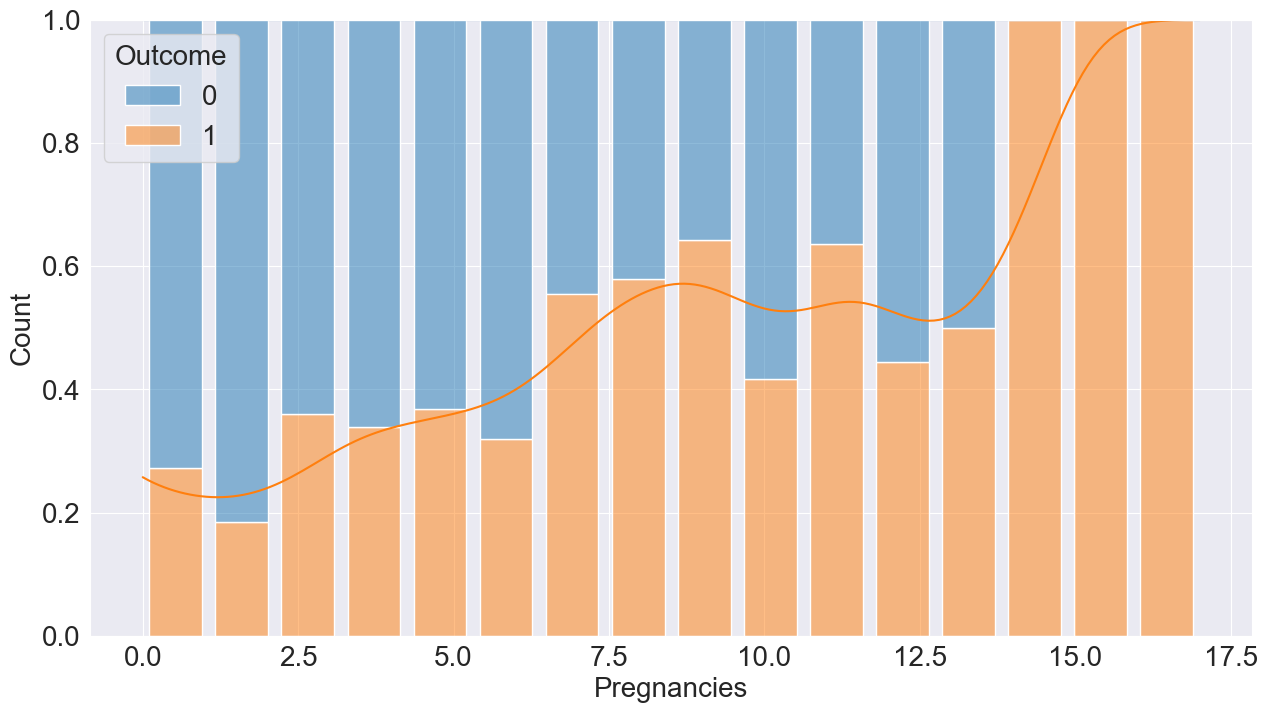

In [39]:
sns.histplot(data=df, x="Pregnancies", hue="Outcome", shrink=0.8, multiple = "fill", kde=True);

There is some positive linear correlation of *Pregnancies* with *Outcome.*
Patients being pregnant for more than 6 time are more likely to have diabetes (about 2x) than the patients being pregnant at most 2 times.

### Analysis of Diabetes Pedigree Function and Outcome

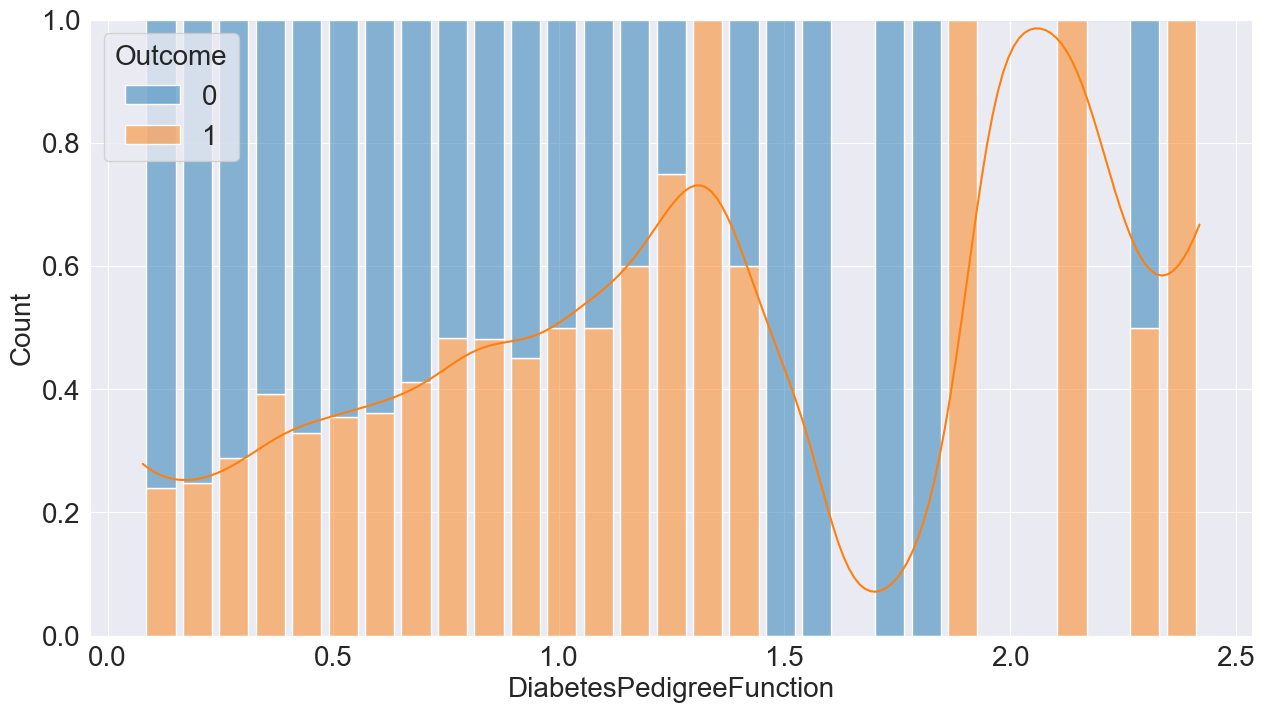

In [40]:
sns.histplot(data=df, x="DiabetesPedigreeFunction", hue="Outcome", shrink=0.8, multiple = "fill", kde=True);

There is some positive linear relationship between Diabetes Pedigree Function and outcome till 1.3. After if the outliers are left showing inappropriate graph.

### Analysis of BMI and Outcome

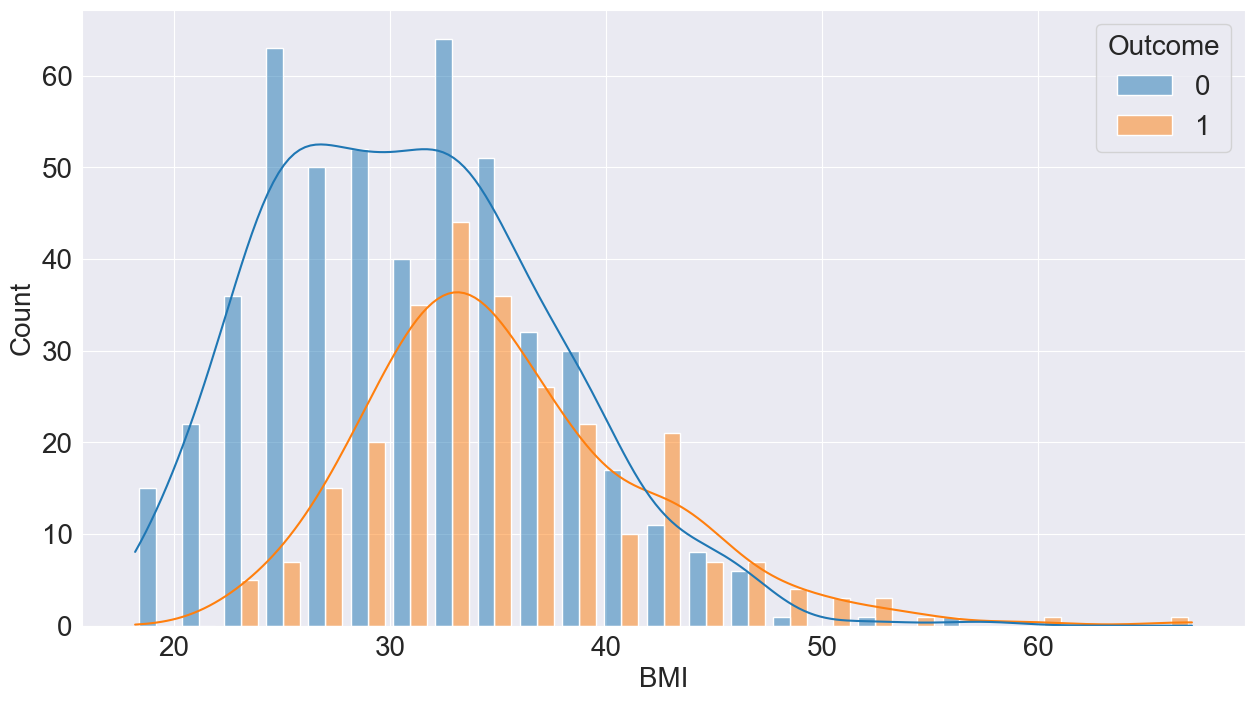

In [41]:
sns.histplot(data=df, x="BMI", hue="Outcome", shrink=0.8, multiple = "dodge", kde=True);

From the above plot, a **positive linear** correlation is evident for BMI.

In [42]:
df.Outcome[df.BMI<25][df.Outcome==1].sum()

7

If the BMI is less than 25 (<25) then the patient is very less likely to have diabetes due to having healthy weight range. But with the increase in BMI above 25 (>25) the number of patents having diabetes increases while number of patents not having diabetes remain constant. Above 36 (>36) BMI, the chances of having diabetes increases. And at last the patient is very high likely to have diabetes above 42.

### Analysis of Age and Outcome

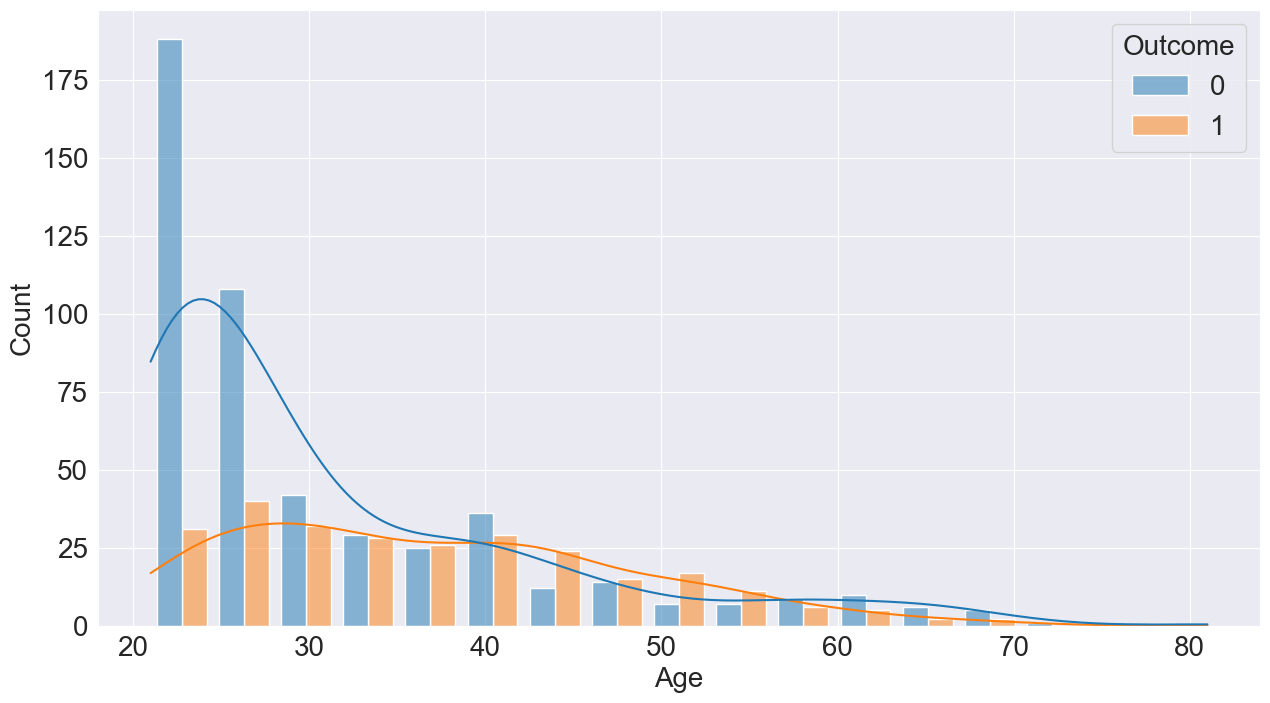

In [43]:
sns.histplot(data=df, x="Age", hue="Outcome", shrink=0.8, multiple = "dodge", kde=True);

For Age greater than 35 years, the chances of patients having diabetes increases as evident from the plot i.e. The number of patients having diabetes is more than the number of people **not** having diabetes. But, it does not hold true for ages above 60 **(60+)**. 
There is some positive linear relation though.

## Multivariate Analysis

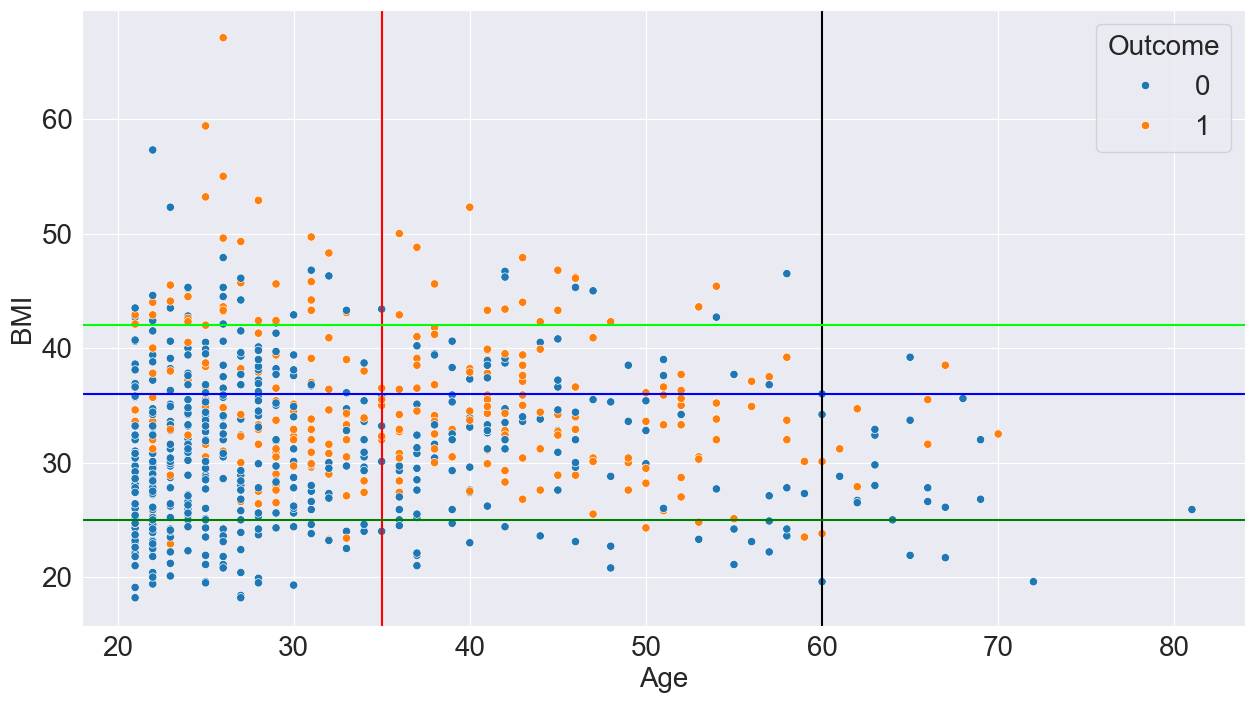

In [44]:
sns.scatterplot(x="Age", y="BMI", data=df , hue="Outcome");
plt.axvline(35,color='red');
plt.axvline(60,color='black');
plt.axhline(25,color='green');
plt.axhline(36,color='blue');
plt.axhline(42,color='#00FF00');

##### For BMI between 25 and 36:

In [45]:
print(f"Percentage of people having diabetes for age below 35: {len(df.Outcome[(df.Age<35) & (df.BMI>=25) & (df.BMI<36) & (df.Outcome==1)])*100/len(df.Outcome[(df.Age<35) & (df.BMI>=25) & (df.BMI<36)]):.3f}%")

print(f"Percentage of people having diabetes for age between 35 and 60: {len(df.Outcome[(df.Age>=35) & (df.Age<60) & (df.BMI>=25) & (df.BMI<36) & (df.Outcome==1)])*100/len(df.Outcome[(df.Age>=35) & (df.Age<60) & (df.BMI>=25) & (df.BMI<36)]):.3f}%")

print(f"Percentage of people having diabetes for age above 60: {len(df.Outcome[(df.Age>=60) & (df.BMI>=25) & (df.BMI<36) & (df.Outcome==1)])*100/len(df.Outcome[(df.Age>=60) & (df.BMI>=25) & (df.BMI<36)]):.3f}%")

Percentage of people having diabetes for age below 35: 25.177%
Percentage of people having diabetes for age between 35 and 60: 54.054%
Percentage of people having diabetes for age above 60: 29.167%


##### For BMI between 36 and 42:

In [46]:
print(f"Percentage of people having diabetes for age below 35: {len(df.Outcome[(df.Age<35) & (df.BMI>=36) & (df.BMI<42) & (df.Outcome==1)])*100/len(df.Outcome[(df.Age<35) & (df.BMI>=36) & (df.BMI<42)]):.3f}%")

print(f"Percentage of people having diabetes for age between 35 and 60: {len(df.Outcome[(df.Age>=35) & (df.Age<60) & (df.BMI>=36) & (df.BMI<42) & (df.Outcome==1)])*100/len(df.Outcome[(df.Age>=35) & (df.Age<60) & (df.BMI>=36) & (df.BMI<42)]):.3f}%")

print(f"Percentage of people having diabetes for age above 60: {len(df.Outcome[(df.Age>=60) & (df.BMI>=36) & (df.BMI<42) & (df.Outcome==1)])*100/len(df.Outcome[(df.Age>=60) & (df.BMI>=36) & (df.BMI<42)]):.3f}%")

Percentage of people having diabetes for age below 35: 28.571%
Percentage of people having diabetes for age between 35 and 60: 62.264%
Percentage of people having diabetes for age above 60: 33.333%


##### For BMI above 42:

In [47]:
print(f"Percentage of people having diabetes for age below 35: {len(df.Outcome[(df.Age<35) & (df.BMI>=42) & (df.Outcome==1)])*100/len(df.Outcome[(df.Age<35) & (df.BMI>=42)]):.3f}%")

print(f"Percentage of people having diabetes for age between 35 and 60: {len(df.Outcome[(df.Age>=35) & (df.Age<60) & (df.BMI>=42) & (df.Outcome==1)])*100/len(df.Outcome[(df.Age>=35) & (df.Age<60) & (df.BMI>=42)]):.3f}%")

Percentage of people having diabetes for age below 35: 58.824%
Percentage of people having diabetes for age between 35 and 60: 70.833%


**Observation:-** See the trend in the graph, we can observe that:-
   1. There are less people in the BMI healthy weight range i.e. below 25 after 35 age.
   2. There are more people not having diabetes but having BMI above 25 below 28 age.
   3. There are more people not having diabetes after age 60 irrespective of BMI.                

**Conclusion:-** From our observation, we can conclude that:-
   1. With the increase in age, BMI of people increases and BMI depends upon the weight and height af a person. Since after Adolescents height of a person rarely increases, therefore we can say that people are becomming fat with the increase in age.
   2. The overweight condition shows its affects after 28 age. Thus an adult person is having time to improve the condition of overweight till 28 of age.

### Analyzing Correlations

In [48]:
corr_matrix = df.corr()

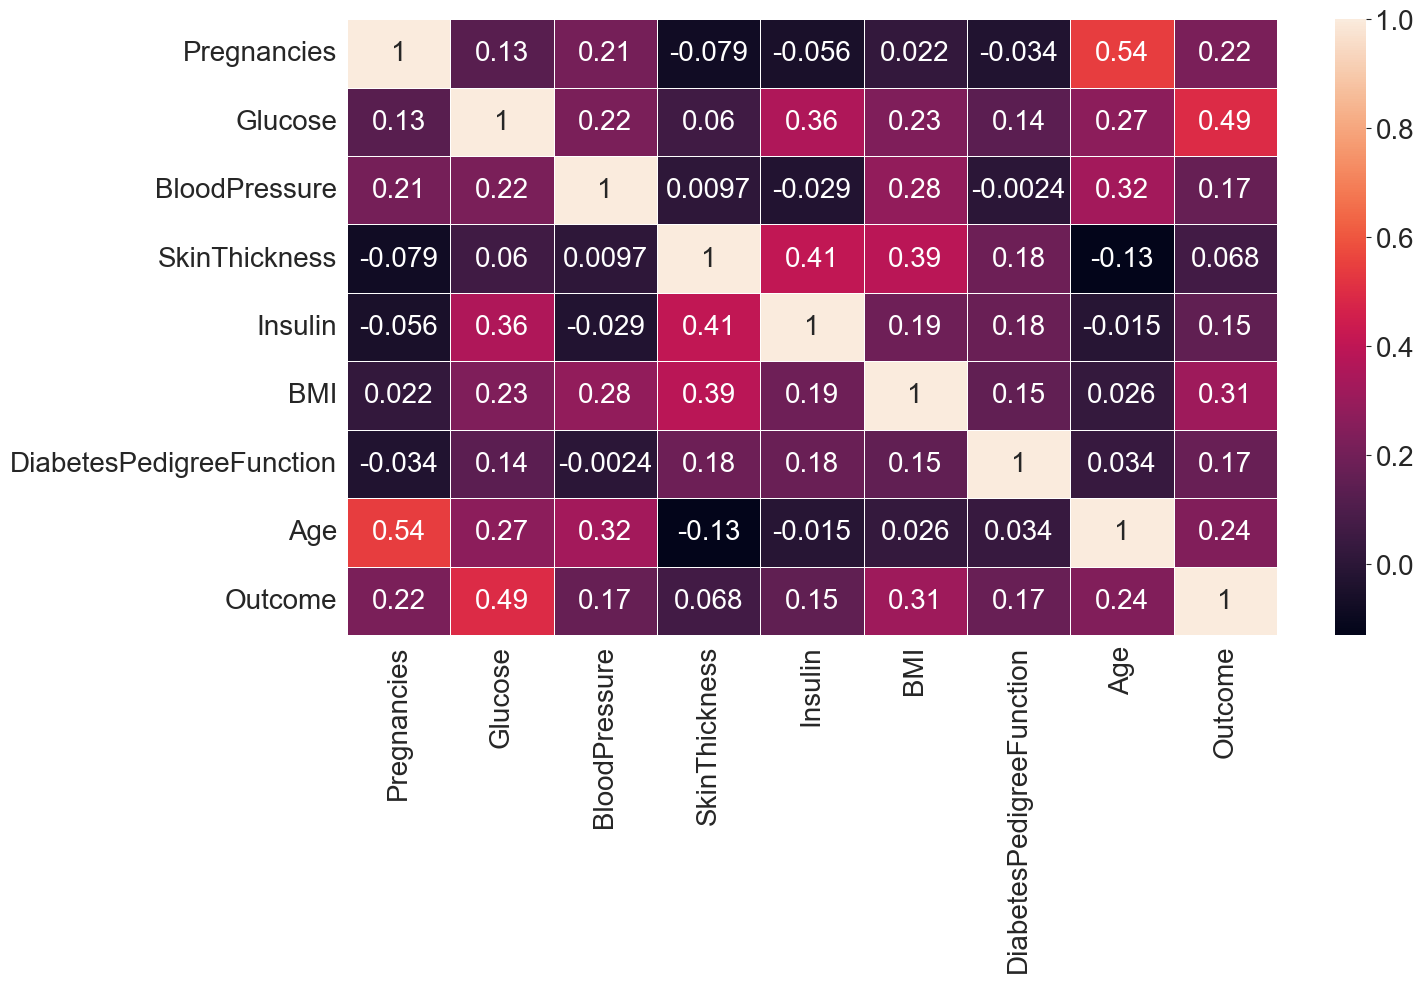

In [49]:
sns.heatmap(data=corr_matrix, annot=True, linewidth=0.5);

In [50]:
corr_matrix.Outcome.sort_values(ascending=False)[1:]

Glucose                     0.492782
BMI                         0.312249
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Insulin                     0.148457
SkinThickness               0.067663
Name: Outcome, dtype: float64

We observe that:
 + Glucose has the maximum positive linear correlation with Outcome.
 + No feature has a negative linear correlation with Outcome.
 + Skin thickness has the lowest positive correlation with Outcome.

## DIABETES PREDICTION:

## Prevailing factors affecting diabetic patients

Glucose and BMI are the prevailing factors affecting diabetic patients. 
 1. With the increase in Glucose levels, number of patients having diabetes increases.
 2. BMI shows its cause for the patients to have diabetes after 25.

## Impact of age

For Age greater than 35 years, the chances of patients having diabetes increases as evident from the plot i.e. The number of patients having diabetes is more than the number of people **not** having diabetes. But, it does not hold true for ages above 60 **(60+)**. 
There is some positive linear relation though.

## Comparing other factors in patients with and without disease

Other factors in the patients affecting the diabetes condition:-
 1. **Pregnancies:-** Patients being pregnant for more than 6 time are more likely to have diabetes (about 2x) than the patients being pregnant at most 2 times.
 2. **Diabetes Pedigree Function:-** The patients having less Diabetes Pedigree Function are less likely to have diabetes than the patients having more Diabetes Pedigree Function. Thus it is also showing linear relationship till 1.3.